In [1]:

import longi_class as lc
import analysis_functions as af
import matplotlib.pyplot as plt
import matplotlib
import longitudinal_functions as lf
import numpy as np
import pickle
import plotting_functions as pf
import os
import scipy.stats as stats
import pingouin as pg
import kaleido

/home/dprotter/anaconda3/envs/computing/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
 def update_values_table(data, animal_numbers, sex_list, days, experiment, metric, values_table):
    ''' data           --> numpy arrays
        animal_numbers --> iterable of animal numbers
        sex_list       --> iterable of animal sex, corresponding with animal_numbers
        days           --> int or, preferably, list of days corresponding with values in data
        experiment     --> experiment name for lookup
        metric         --> name of the value being used'''
    output_df = pd.DataFrame(columns = ['animal', 'day', 'sex', 'value', 'experiment', 'metric'])
    if isinstance(days, int):
        
        #double check we only have 1 day of data
        if len(data[0]) == 1:
            tmp = np.insert(data, values = animal_numbers, obj = 0, axis = 1)
            tmp = np.insert(data, values = sex_list, obj = 1, axis = 1)
            tmp = np.insert(tmp, values = days)
            tmp_df = pd.DataFrame(tmp, columns = ['animal', 'day', 'value'])
            output_df = pd.concat((output_df, tmp_df), ignore_index = True)
            output_df['experiment'] = experiment
            output_df['metric'] = metric
    else:
        
        if len(data[0]) != len(days):
            
            raise Exception('data and days length mismatch')
        else:
            
            for ani_data, animal, sex in zip(data, animal_numbers, sex_list):
                tmp_df = pd.DataFrame(ani_data, columns = ['value'])
                tmp_df['day'] = days
                tmp_df['animal'] = animal
                tmp_df['sex'] = sex
                tmp_df['experiment'] = experiment
                tmp_df['metric'] = metric
                output_df = pd.concat((output_df, tmp_df), ignore_index = True)
    return pd.concat((output_df, values_table), ignore_index= True)

In [3]:
males= sorted(['4145','4146','4140', '4139', '4142', '4143'])
females = sorted(['4136','784','4096','4148','4144','4147'])

animal_order = males+females
animal_order = [int(el) for el in animal_order]
names = af.assemble_names('/home/dprotter/Downloads/csv')
sum_files = [file for file in sorted(names) if 'summary' in file]


In [4]:

lon_ana = lc.LongitudinalAnalysis('all_exp')

In [5]:
if os.path.exists('/home/dprotter/Downloads/lon_ana.pickle'):
    print('loading data')
    lon_ana = lon_ana.open('/home/dprotter/Downloads/lon_ana.pickle')

loading data


In [6]:

files_to_load = [f for f in sum_files if not f in lon_ana.files]
for f in files_to_load:
    lon_ana.add_summary_csv(f)

In [7]:
lon_ana.save('/home/dprotter/Downloads/lon_ana.pickle')

this path exists and will be overwritten.


In [8]:
mets = lon_ana.metrics
lon_ana.animal_order = animal_order

In [9]:
dataset = lon_ana
met = lon_ana.metrics['total_lever_press'].data
experiment = "Autoshape"
days = None
data = met.loc[met.experiment == experiment]

anis = dataset.animal_order if dataset.animal_order else sorted(data.animal.unique() )

if days == None:
    days = sorted(data.day.unique() )

out = np.empty((len(anis), len(days)))
out[:,:] = np.nan

for i, ani in enumerate(anis):

    ani_slice = data.loc[data.animal == ani]
    
    
    for j, d in enumerate(days):
        if d in ani_slice.day.unique():
            val = ani_slice.loc[ani_slice.day == d, 'value'].values[0]
            
            out[i,j] = val
print(out)

[[15. 20. 19. 18.]
 [ 3.  5.  5.  8.]
 [18. 19. 17. 20.]
 [ 9. 18. 19. 19.]
 [19. 20. 20. 20.]
 [ 3.  2.  6.  7.]
 [16. 19. 20. 20.]
 [13. 20. 12.  8.]
 [15.  9. 19. 19.]
 [15. 19. 19. 20.]
 [11. 19. 16. 15.]
 [ 4.  6. 19. 18.]]


In [10]:
lon_ana.animal_order = animal_order

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/home/dprotter/anaconda3/envs/computing/lib/python3.8/site-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)
/home/dprotter/.local/lib/python3.8/site-packages/matplotlib/ticker.py:432: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  return self.fmt.format(x=x, pos=pos)
<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/home/dprotter/anaconda3/envs/computing/lib/python3.8/site-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)
/home/dprotter/.local/lib/python3.8/site-packages/matplotlib/ticker.py:432: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different be

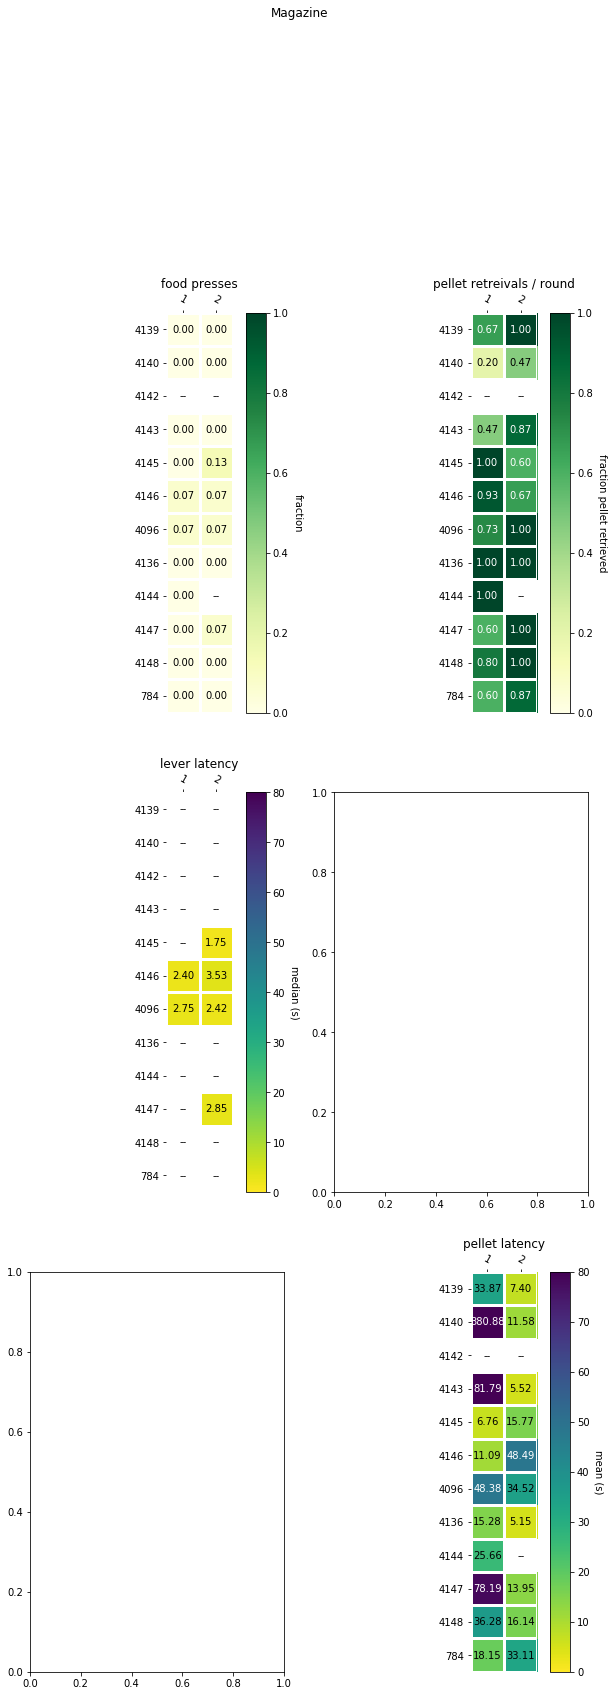

In [11]:
if 'Magazine' in lon_ana.experiments:

    metric = 'percent_food_presses'
    experiment = 'Magazine'

    fig, axs = plt.subplots(ncols = 2, nrows = 3, figsize = (10,25)) 


    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'food presses', cbarlabel = 'fraction', ax = axs[0,0])

    metric = 'proportion_round_pellet_retrieved'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'pellet retreivals / round', cbarlabel = 'fraction pellet retrieved', ax = axs[0,1])



    cmap_r = plt.cm.get_cmap('viridis').reversed()
    metric = 'median_food_lever_press_latency'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'lever latency', cbarlabel = 'median (s)', ax = axs[1,0], 
                        cmap = cmap_r, val_ceil = 80, val_floor = 0)


    '''
    metric = 'median_pellet_latency'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'pellet latency', cbarlabel = 'median (s)', ax = axs[1,1], 
                        cmap = cmap_r, val_ceil = 80, valr latency', cbarlabel = 'mean (s)', ax = axs[2,0], 
                        cmap = cmap_r, val_ceil = 80, val_floor = 0)
    '''


    metric = 'mean_pellet_latency'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'pellet latency', cbarlabel = 'mean (s)', ax = axs[2,1], 
                        cmap = cmap_r, val_ceil = 80, val_floor = 0)
    fig.suptitle(experiment, y = 1.05)

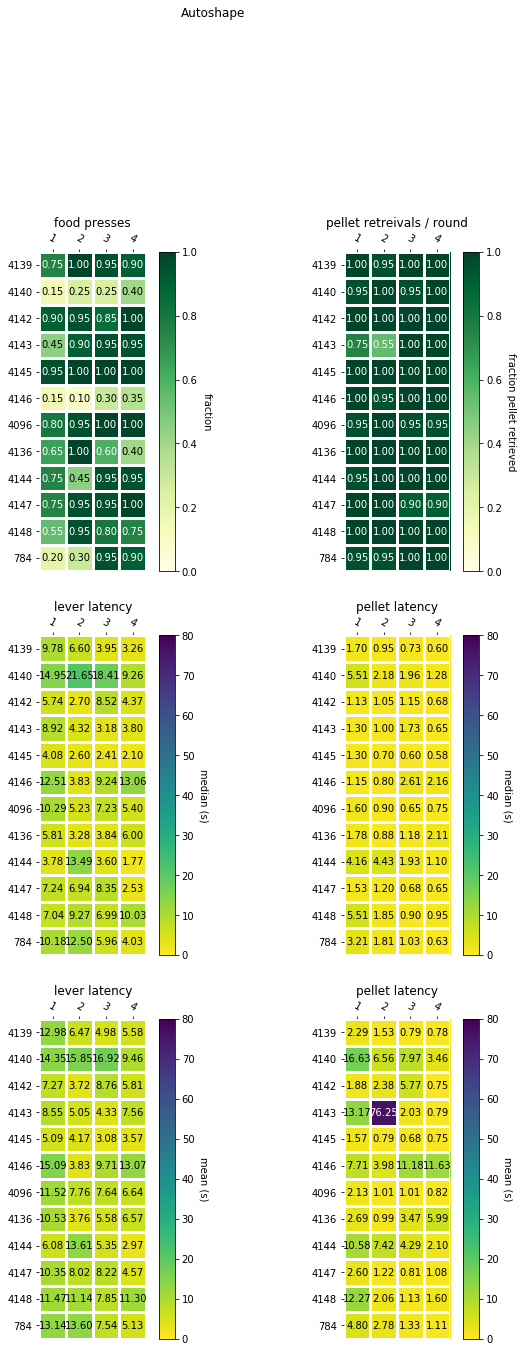

In [12]:

if 'Autoshape' in lon_ana.experiments:

    metric = 'percent_food_presses'
    experiment = 'Autoshape'

    fig, axs = plt.subplots(ncols = 2, nrows = 3, figsize = (10,20)) 


    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'food presses', cbarlabel = 'fraction', ax = axs[0,0])

    metric = 'proportion_round_pellet_retrieved'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'pellet retreivals / round', cbarlabel = 'fraction pellet retrieved', ax = axs[0,1])



    cmap_r = plt.cm.get_cmap('viridis').reversed()
    metric = 'median_food_lever_press_latency'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'lever latency', cbarlabel = 'median (s)', ax = axs[1,0], 
                        cmap = cmap_r, val_ceil = 80, val_floor = 0)


    metric = 'median_pellet_latency'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'pellet latency', cbarlabel = 'median (s)', ax = axs[1,1], 
                        cmap = cmap_r, val_ceil = 80, val_floor = 0)
    fig.suptitle(experiment, y = 1.05)


    cmap_r = plt.cm.get_cmap('viridis').reversed()
    metric = 'mean_food_lever_press_latency'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'lever latency', cbarlabel = 'mean (s)', ax = axs[2,0], 
                        cmap = cmap_r, val_ceil = 80, val_floor = 0)



    metric = 'mean_pellet_latency'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'pellet latency', cbarlabel = 'mean (s)', ax = axs[2,1], 
                        cmap = cmap_r, val_ceil = 80, val_floor = 0)
    fig.suptitle(experiment, y = 1.05)

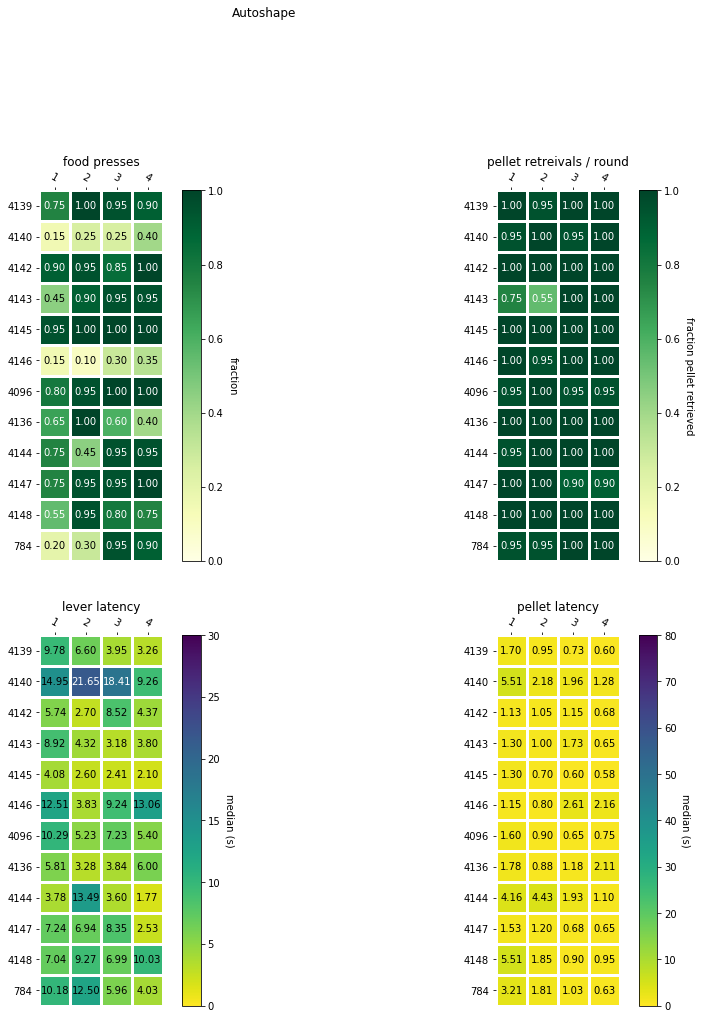

In [13]:
if 'Autoshape' in lon_ana.experiments:
    metric = 'percent_food_presses'
    experiment = 'Autoshape'

    fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize = (15,15)) 


    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'food presses', cbarlabel = 'fraction', ax = axs[0,0])

    metric = 'proportion_round_pellet_retrieved'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'pellet retreivals / round', cbarlabel = 'fraction pellet retrieved', ax = axs[0,1])

    cmap_r = plt.cm.get_cmap('viridis').reversed()
    metric = 'median_food_lever_press_latency'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'lever latency', cbarlabel = 'median (s)', ax = axs[1,0], 
                        cmap = cmap_r, val_ceil = 30, val_floor = 0)


    metric = 'median_pellet_latency'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'pellet latency', cbarlabel = 'median (s)', ax = axs[1,1], 
                        cmap = cmap_r, val_ceil = 80, val_floor = 0)
    fig.suptitle(experiment, y = 1.05)

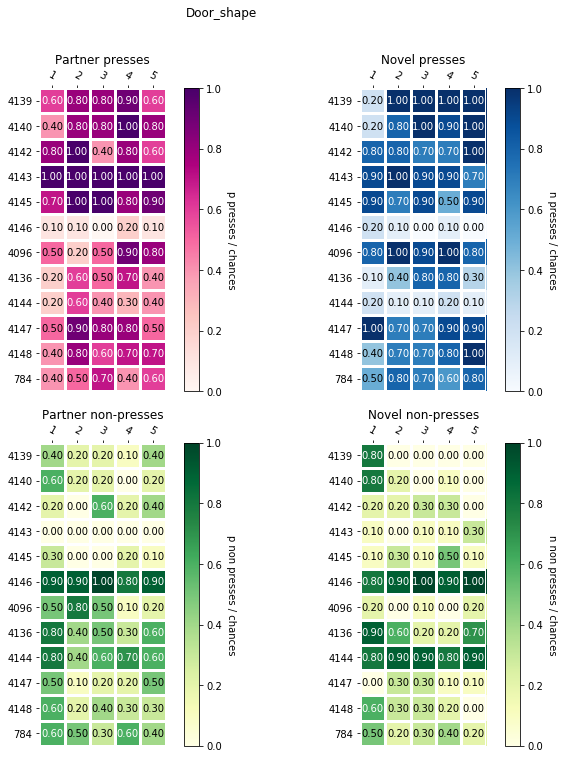

In [14]:

if 'Door_shape' in lon_ana.experiments:
    metric = 'door_1_lever_press_round_proportion'
    experiment = 'Door_shape'

    fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize = (10, 10))

    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    a = pf.make_heatmap(vals, ani, days, ax = axs[0,0],
                        title = "Partner presses", 
                        cbarlabel = 'p presses / chances',
                        cmap = 'RdPu')

    metric = 'door_2_lever_press_round_proportion'
    experiment = 'Door_shape'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    a = pf.make_heatmap(vals, ani, days, ax = axs[0,1],
                        title = "Novel presses", 
                        cbarlabel = 'n presses / chances',
                        cmap = 'Blues')

    metric = 'door_1_non_press_round_proportion'
    experiment = 'Door_shape'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    a = pf.make_heatmap(vals, ani, days, ax = axs[1,0],
                        title = "Partner non-presses", 
                        cbarlabel = 'p non presses / chances',
                        cmap = 'YlGn')

    metric = 'door_2_non_press_round_proportion'
    experiment = 'Door_shape'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    a = pf.make_heatmap(vals, ani, days, ax = axs[1,1],
                        title = "Novel non-presses", 
                        cbarlabel = 'n non presses / chances',
                        cmap = 'YlGn')

    fig.suptitle(experiment, y = 1.05)
    fig.tight_layout()

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/home/dprotter/anaconda3/envs/computing/lib/python3.8/site-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)
/home/dprotter/.local/lib/python3.8/site-packages/matplotlib/ticker.py:432: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  return self.fmt.format(x=x, pos=pos)


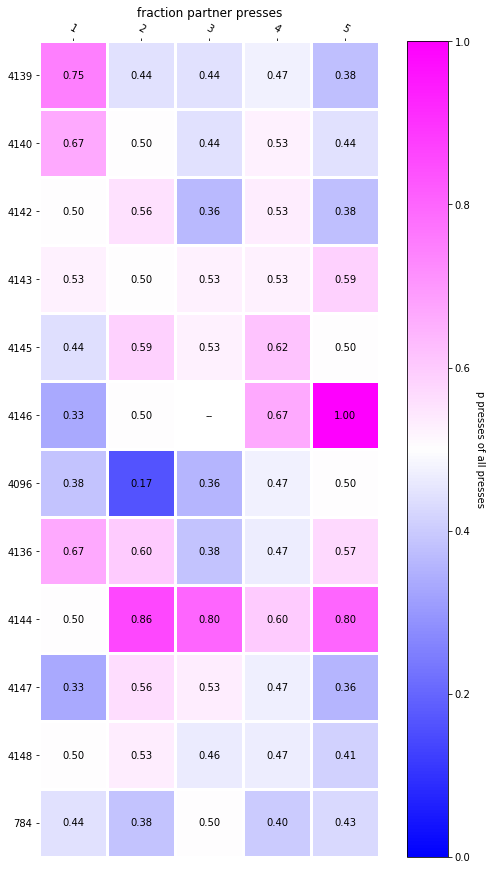

In [15]:
if 'Door_shape' in lon_ana.experiments:
    metric = 'door_1_lever_press_total_press_proportion'
    experiment = 'Door_shape'

    cmap = pf.get_continuous_cmap(['#0000FF','#FFFFFF','#ff00ff'])

    fig, ax = plt.subplots(figsize = (10,15))
    
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    a = pf.make_heatmap(vals, ani, days, ax = ax,
                        title = "fraction partner presses", 
                        cbarlabel = 'p presses of all presses',
                        cmap = cmap, val_floor = 0, val_ceil = 1, threshold = 1)

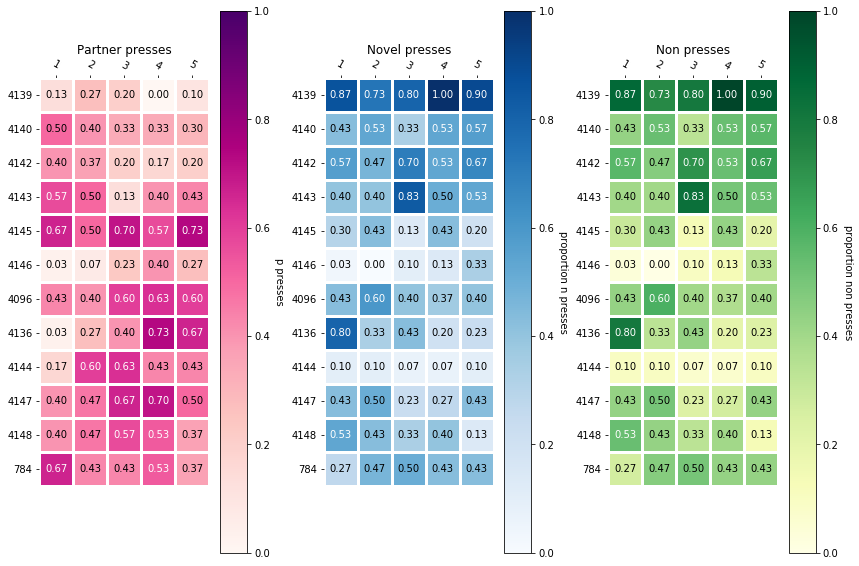

In [16]:
if 'Door_test' in lon_ana.experiments:
    metric = 'door_1_lever_press_round_proportion'
    experiment = 'Door_test'

    fig, axs = plt.subplots(ncols = 3, figsize = (12,8))

    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    a = pf.make_heatmap(vals, ani, days, ax = axs[0],
                        title = "Partner presses", 
                        cbarlabel = 'p presses',
                        cmap = 'RdPu', val_floor = 0, val_ceil = 1)

    metric = 'door_2_lever_press_round_proportion'
    experiment = 'Door_test'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    a = pf.make_heatmap(vals, ani, days, ax = axs[1],
                        title = "Novel presses", 
                        cbarlabel = 'proportion n presses',
                        cmap = 'Blues')

    metric = 'prop_non_presses_by_rounds'
    experiment = 'Door_test'
    a = pf.make_heatmap(vals, ani, days, ax = axs[2],
                        title = "Non presses", 
                        cbarlabel = 'proportion non presses',
                        cmap = 'YlGn')
    fig.tight_layout()

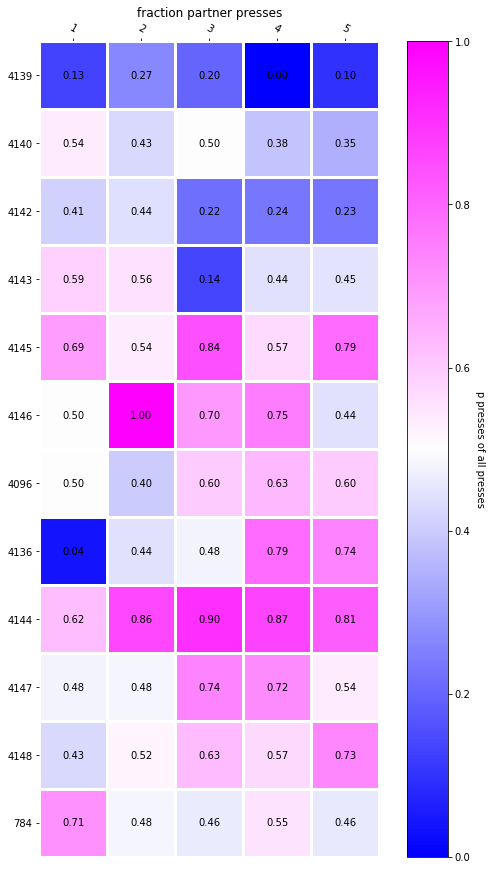

In [17]:
if 'Door_test' in lon_ana.experiments:
    metric = 'door_1_lever_press_total_press_proportion'
    experiment = 'Door_test'

    cmap = pf.get_continuous_cmap(['#0000FF','#FFFFFF','#ff00ff'])

    fig, ax = plt.subplots(figsize = (10,15))
    
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    a = pf.make_heatmap(vals, ani, days, ax = ax,
                        title = "fraction partner presses", 
                        cbarlabel = 'p presses of all presses',
                        cmap = cmap, val_floor = 0, val_ceil = 1, threshold = 1)

In [18]:
mets

{'rounds': <longi_class.Metric at 0x7f0a116f9190>,
 'total_lever_press': <longi_class.Metric at 0x7f0a11f61e80>,
 'non_press_rounds': <longi_class.Metric at 0x7f0967909370>,
 'prop_non_presses_by_rounds': <longi_class.Metric at 0x7f0967909f70>,
 'percent_food_presses': <longi_class.Metric at 0x7f09668b40a0>,
 'mean_food_lever_press_latency': <longi_class.Metric at 0x7f09668b46d0>,
 'median_food_lever_press_latency': <longi_class.Metric at 0x7f09668b49a0>,
 'mean_pellet_latency': <longi_class.Metric at 0x7f09668b4fa0>,
 'median_pellet_latency': <longi_class.Metric at 0x7f096685f610>,
 'num_pellet_retrieved': <longi_class.Metric at 0x7f096685fc40>,
 'proportion_round_pellet_retrieved': <longi_class.Metric at 0x7f09668652b0>,
 'proportion_pellet_retrieved': <longi_class.Metric at 0x7f09668658e0>,
 'animal_ID': <longi_class.Metric at 0x7f0966865f10>,
 'day': <longi_class.Metric at 0x7f096686e580>,
 'experiment': <longi_class.Metric at 0x7f096686ebb0>,
 'date': <longi_class.Metric at 0x7f09

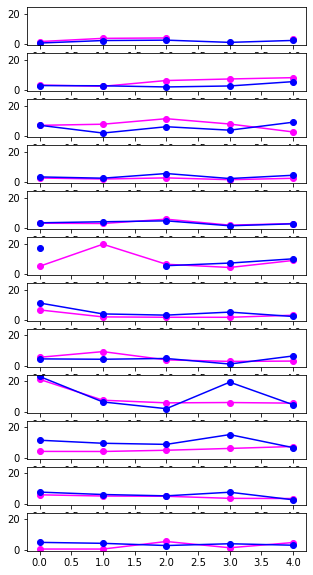

In [19]:
metric = 'median_door_1_lever_press_latency'
experiment = 'Door_test'

ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)

metric = 'median_door_2_lever_press_latency'
experiment = 'Door_test'

ani2, days2, vals2 = lf.get_data(metric, experiment = experiment, dataset = lon_ana)

fig, ax = plt.subplots(nrows = 12, sharey = True, figsize = (5, 10))
for a, data1, data2 in zip(ax.ravel(), vals, vals2):
    a.plot(data1, 'o-', color = '#ff00ff')
    a.plot(data2, 'o-', color = 'blue')

/home/dprotter/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


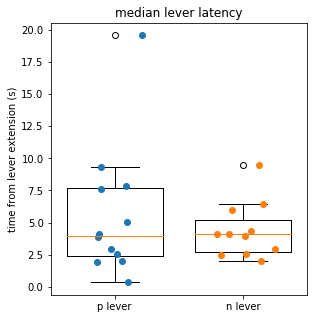

In [20]:
import random

fig, ax = plt.subplots(figsize = (5,5))
ax.boxplot([vals[:,1], vals2[:,1][~np.isnan(vals2[:,1])]], widths = 0.75)
ax.set_xticklabels(('p lever', 'n lever'))
ax.set_title("median lever latency")
ax.set_ylabel('time from lever extension (s)')

xs = [(0.5 - random.random())/2 + 1 for _ in range(12)]
ax.plot(xs, vals[:,1], 'o')

xs = [(0.5 - random.random())/2 + 2 for _ in range(12)]
ax.plot(xs, vals2[:,1], 'o')

ax.set_aspect(0.1)

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/home/dprotter/anaconda3/envs/computing/lib/python3.8/site-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)
/home/dprotter/.local/lib/python3.8/site-packages/matplotlib/ticker.py:432: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  return self.fmt.format(x=x, pos=pos)


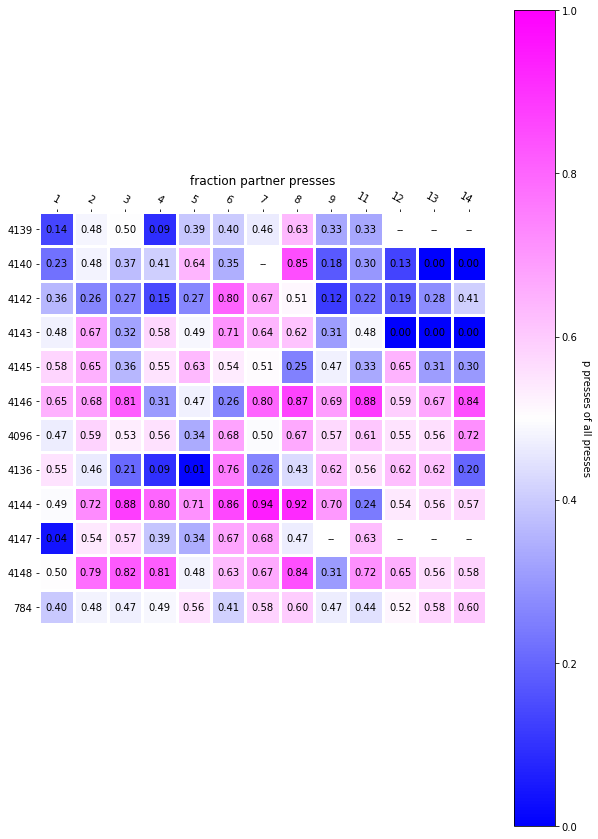

In [21]:
if 'progressive_ratio' in lon_ana.experiments:
    metric = 'door_1_lever_press_count'
    experiment = 'progressive_ratio'

    cmap = pf.get_continuous_cmap(['#0000FF','#FFFFFF','#ff00ff'])

    fig, ax = plt.subplots(figsize = (10,15))
    
    ani_d1, days, vals_d1 = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    
    metric = 'door_2_lever_press_count'
    ani_d2, days, vals_d2 = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    
    frac = vals_d1 / (vals_d1 + vals_d2)
    
    a = pf.make_heatmap(frac, ani_d1, days, ax = ax,
                        title = "fraction partner presses", 
                        cbarlabel = 'p presses of all presses',
                        cmap = cmap, val_floor = 0, val_ceil = 1, threshold = 1)

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/home/dprotter/anaconda3/envs/computing/lib/python3.8/site-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)
/home/dprotter/.local/lib/python3.8/site-packages/matplotlib/ticker.py:432: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  return self.fmt.format(x=x, pos=pos)


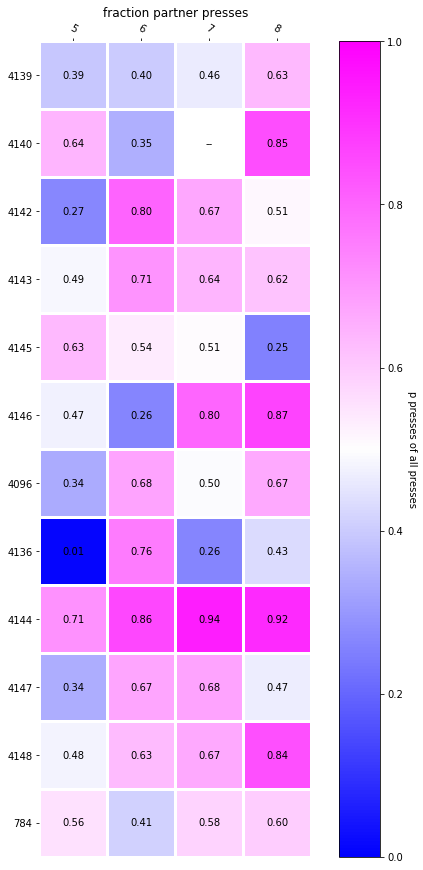

In [22]:
if 'progressive_ratio' in lon_ana.experiments:
    lon_ana.animal_order = animal_order
    metric = 'door_1_lever_press_count'
    experiment = 'progressive_ratio'

    cmap = pf.get_continuous_cmap(['#0000FF','#FFFFFF','#ff00ff'])

    fig, ax = plt.subplots(figsize = (10,15))
    
    days = [5, 6, 7, 8]
    
    ani_d1, days, vals_d1 = lf.get_data(metric, days = days, experiment = experiment, dataset = lon_ana)
    
    metric = 'door_2_lever_press_count'
    ani_d2, days, vals_d2 = lf.get_data(metric,days = days, experiment = experiment, dataset = lon_ana)
    
    frac = vals_d1 / (vals_d1 + vals_d2)
    
    a = pf.make_heatmap(frac, ani_d1, days, ax = ax,
                        title = "fraction partner presses", 
                        cbarlabel = 'p presses of all presses',
                        cmap = cmap, val_floor = 0, val_ceil = 1, threshold = 1)

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/home/dprotter/anaconda3/envs/computing/lib/python3.8/site-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)
/home/dprotter/.local/lib/python3.8/site-packages/matplotlib/ticker.py:432: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  return self.fmt.format(x=x, pos=pos)


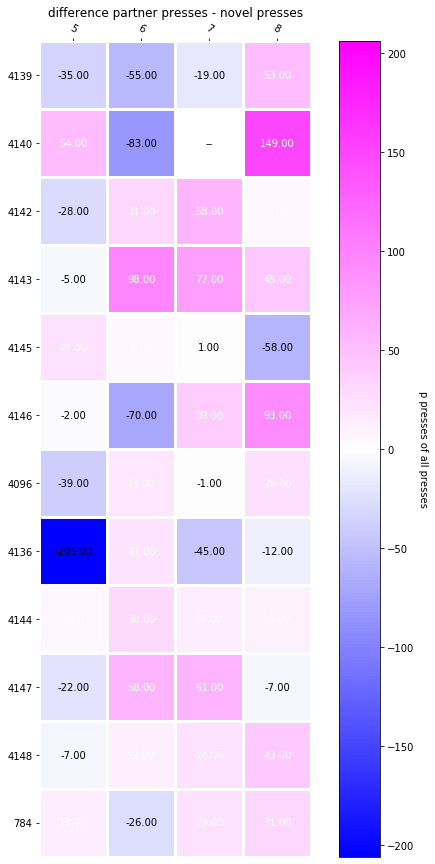

In [23]:
if 'progressive_ratio' in lon_ana.experiments:
    lon_ana.animal_order = animal_order
    metric = 'door_1_lever_press_count'
    experiment = 'progressive_ratio'

    cmap = pf.get_continuous_cmap(['#0000FF','#FFFFFF','#ff00ff'])

    fig, ax = plt.subplots(figsize = (10,15))
    
    days = [5, 6, 7, 8]
    
    ani_d1, days, vals_d1 = lf.get_data(metric, days = days, experiment = experiment, dataset = lon_ana)
    
    metric = 'door_2_lever_press_count'
    ani_d2, days, vals_d2 = lf.get_data(metric,days = days, experiment = experiment, dataset = lon_ana)
    
    diff = vals_d1 - vals_d2
    max_val = np.abs(diff[~np.isnan(diff)]).max()
    a = pf.make_heatmap(diff, ani_d1, days, ax = ax,
                        title = "difference partner presses - novel presses", 
                        cbarlabel = 'p presses of all presses',
                        cmap = cmap, val_ceil=max_val, val_floor=-max_val, threshold = 1)

In [24]:

import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as psp
import random
import pingouin
colors = {'male':'lightseagreen', 'female':'mediumpurple'}
colors_rgb = {'male':(32/255,178/255,170/255), 'female':(147/255,112/255,219/255)}

In [25]:
def match_style(fig_obj, text_annotate = None):

    fig_obj.update_layout(xaxis = dict(tickmode = 'array', 
                        tickvals = [0,1], 
                        ticktext = ['male', 'female']))

    fig_obj.update_xaxes(linewidth=5,
                    tickfont=dict(size=26),
                    tickwidth=4)
    fig_obj.update_yaxes(linewidth=5,
                    tickfont=dict(size=28),
                    tickwidth=4,) #for big use title_font = dict(size=48)
    fig_obj.update_annotations(font_size=34)
    fig_obj.update_layout(font=dict(size=30),
                        title_x=0.5)
    if text_annotate:
        fig_obj.add_annotation(dict(font=dict(color="black",size=12),
                            #x=x_loc,
                            x=1.25,
                            y=1.06,
                            showarrow=False,
                            text=f'male p: {round(out_m["p-val"].values[0], 4)}<br>female p: {round(out_f["p-val"].values[0],4)}',
                            textangle=0,
                            xref="x",
                            yref="paper"
                           ))

In [26]:
import pandas as pd


In [27]:
def random_jitter_x_values(center:float, number:int , width = 0.5):
    '''return a list with randomly jittered x coordinates. 
    center = x value the distribution should be centered on
    number = number of samples
    width  = width to be covered by distribution'''
    return [(0.5 - random.random())*width/2 + center for _ in range(number)]

In [45]:
values_table = pd.DataFrame()



experiment = "Door_test"
metric = 'door_1_lever_press_count'

ani, days, vals_d1 = lf.get_data(metric = metric, 
                             experiment= experiment, 
                             dataset = lon_ana)


values_table = update_values_table(data = vals_d1, 
                                   days = days, 
                                   animal_numbers= ani, 
                                   sex_list = ['m']*6+['f']*6,
                                   experiment = experiment,
                                   metric = 'partner presses',
                                   values_table = values_table)



metric = 'door_2_lever_press_count'
ani, days, vals_d2 = lf.get_data(metric = metric, 
                             experiment= experiment, 
                             dataset = lon_ana)


values_table = update_values_table(data = vals_d2, 
                                   days = days, 
                                   animal_numbers= ani, 
                                   sex_list = ['m']*6+['f']*6,
                                   experiment = experiment,
                                   metric = 'novel presses',
                                   values_table = values_table)



pref = vals_d1 / (vals_d1 + vals_d2)


values_table = update_values_table(data = pref, 
                                   days = days, 
                                   animal_numbers= ani, 
                                   sex_list = ['m']*6+['f']*6,
                                   experiment = experiment,
                                   metric = 'fraction partner presses of all presses',
                                   values_table = values_table)



#################------------------door shape presses----------------------#########################333



experiment = "Door_shape"
metric = 'door_1_lever_press_count'

ani, days, vals_d1 = lf.get_data(metric = metric, 
                             experiment= experiment, 
                             dataset = lon_ana)


values_table = update_values_table(data = pref, 
                                   days = days, 
                                   animal_numbers= ani, 
                                   sex_list = ['m']*6+['f']*6,
                                   experiment = experiment,
                                   metric = 'partner presses',
                                   values_table = values_table)



metric = 'door_2_lever_press_count'
ani, days, vals_d2 = lf.get_data(metric = metric, 
                             experiment= experiment, 
                             dataset = lon_ana)


values_table = update_values_table(data = pref, 
                                   days = days, 
                                   animal_numbers= ani, 
                                   sex_list = ['m']*6+['f']*6,
                                   experiment = experiment,
                                   metric = 'novel presses',
                                   values_table = values_table)



pref = vals_d1 / (vals_d1 + vals_d2)


values_table = update_values_table(data = pref, 
                                   days = days, 
                                   animal_numbers= ani, 
                                   sex_list = ['m']*6+['f']*6,
                                   experiment = experiment,
                                   metric = 'fraction partner presses of all presses',
                                   values_table = values_table)



#####################-------------autoshape presses----------------###############################33


####
experiment = "Autoshape"
metric = 'total_lever_press'


ani, days, presses = lf.get_data(metric = metric, experiment= experiment, dataset = lon_ana)


first = np.zeros_like(presses)

for i in range(len(presses[0])):
    first[:,i] = presses[:,0]
    
diff = (presses - first) 

values_table = update_values_table(data = diff, 
                                   days = days, 
                                   animal_numbers= ani, 
                                   sex_list = ['m']*6+['f']*6,
                                   experiment = experiment,
                                   metric = 'difference in presses from day 1',
                                   values_table = values_table)


####

experiment = "Autoshape"
metric = 'total_lever_press'


ani, days, presses = lf.get_data(metric = metric, experiment= experiment, dataset = lon_ana)


values_table = update_values_table(data = presses, 
                                   days = days, 
                                   animal_numbers= ani, 
                                   metric = metric,
                                   sex_list = ['m']*6+['f']*6,
                                   experiment= experiment,
                                   values_table = values_table)

metric = 'median_food_lever_press_latency'
ani, days, latencies = lf.get_data(metric = metric, experiment= experiment, dataset = lon_ana)

values_table = update_values_table(data = latencies, 
                                   days = days, 
                                   animal_numbers= ani, 
                                   sex_list = ['m']*6+['f']*6,
                                   experiment = experiment,
                                   metric = 'median pellet latency',
                                   values_table = values_table)


first = np.zeros((12,len(latencies[0])))


for i in range(len(latencies[0])):
    first[:,i] = latencies[:,0]

diff = latencies - first

values_table = update_values_table(data = diff, 
                                   days = days, 
                                   animal_numbers= ani, 
                                   sex_list = ['m']*6+['f']*6,
                                   experiment = experiment,
                                   metric = 'difference median pellet latency from day 1',
                                   values_table = values_table)

experiment = "Door_shape"
metric = 'total_lever_press'


ani, days, presses_d1 = lf.get_data(metric = metric, experiment= experiment, dataset = lon_ana)

press_m1, press_f1 = presses_d1[:6], presses_d1[6:]

num_days = len(press_m1[0])
first_m = np.zeros((6,num_days))
first_f = np.zeros((6,num_days))

for i in range(len(press_m1[0])):
    first_m[:,i] = press_m1[:,0]
    first_f[:,i] = press_f1[:,0]
diff_m = press_m1 / first_m
diff_f = press_f1 / first_f

values_table = update_values_table(data = diff_m, 
                                   days = days, 
                                   animal_numbers= ani[:6], 
                                   sex_list = ['m'],
                                   experiment = experiment,
                                   metric = 'total presses normalized to day 1',
                                   values_table = values_table)
values_table = update_values_table(data = diff_f, 
                                   days = days, 
                                   animal_numbers= ani[6:], 
                                   sex_list = ['f'],
                                   experiment = experiment,
                                   metric = 'total presses normalized to day 1',
                                   values_table = values_table)

experiment = "Autoshape"
metric = 'total_lever_press'


ani, days, presses_d1 = lf.get_data(metric = metric, experiment= experiment, dataset = lon_ana)

press_m1, press_f1 = presses_d1[:6], presses_d1[6:]

num_days = len(press_m1[0])
first_m = np.zeros((6,num_days))
first_f = np.zeros((6,num_days))

for i in range(len(press_m1[0])):
    first_m[:,i] = press_m1[:,0]
    first_f[:,i] = press_f1[:,0]
diff_m = press_m1 / first_m
diff_f = press_f1 / first_f

values_table = update_values_table(data = diff_m, 
                                   days = days, 
                                   animal_numbers= ani[:6], 
                                   sex_list = ['m'],
                                   experiment = experiment,
                                   metric = 'total presses normalized to day 1',
                                   values_table = values_table)
values_table = update_values_table(data = diff_f, 
                                   days = days, 
                                   animal_numbers= ani[6:], 
                                   sex_list = ['f'],
                                   experiment = experiment,
                                   metric = 'total presses normalized to day 1',
                                   values_table = values_table)


experiment = "Autoshape"
metric = 'median_food_lever_press_latency'


ani, days, medians = lf.get_data(metric = metric, experiment= experiment, dataset = lon_ana)
med_m, med_f = medians[:6], medians[6:]

first_f = np.zeros((6,4))
first_m = np.zeros((6,4))

for i in range(len(med_m[0])):
    first_m[:,i] = med_m[:,0]
    first_f[:,i] = med_f[:,0]
    
norm_m = med_m / first_m
norm_f = med_f / first_f

values_table = update_values_table(data = norm_m, 
                                   days = days, 
                                   animal_numbers= ani[:6], 
                                   sex_list = ['m'],
                                   experiment = experiment,
                                   metric = 'median lever press latency difference from day 1',
                                   values_table = values_table)

values_table = update_values_table(data = norm_f, 
                                   days = days, 
                                   animal_numbers= ani[6:], 
                                   sex_list = ['f'],
                                   experiment = experiment,
                                   metric = 'median lever press latency difference from day 1',
                                   values_table = values_table)


values_table.loc[values_table.experiment == 'Door_shape', 'experiment'] = 'social non-choice training'
values_table.loc[values_table.experiment == 'Door_test', 'experiment'] = 'social choice'

values_table.to_csv('/home/dprotter/Documents/Donaldson Lab Writing/liza paper/data tables/operant_chamber_metrics.csv')

<ipython-input-45-20e60ccb4ed3>:90: RuntimeWarning:

invalid value encountered in true_divide



In [42]:
values_table.loc[values_table.metric == 'fraction partner presses of all presses']

,animal,day,sex,value,experiment,metric
192,4139,1,m,0.750000,Door_shape,fraction partner presses of all presses
193,4139,2,m,0.444444,Door_shape,fraction partner presses of all presses
194,4139,3,m,0.444444,Door_shape,fraction partner presses of all presses
195,4139,4,m,0.473684,Door_shape,fraction partner presses of all presses
196,4139,5,m,0.375000,Door_shape,fraction partner presses of all presses
...,...,...,...,...,...,...
427,784,1,f,0.714286,Door_test,fraction partner presses of all presses
428,784,2,f,0.481481,Door_test,fraction partner presses of all presses
429,784,3,f,0.464286,Door_test,fraction partner presses of all presses
430,784,4,f,0.551724,Door_test,fraction partner presses of all presses


In [29]:
experiment = "Autoshape"
metric = 'total_lever_press'


ani, day, presses = lf.get_data(metric = metric, experiment= experiment, dataset = lon_ana)


first = np.zeros((12,4))

for i in range(len(presses[0])):
    first[:,i] = presses[:,0]
    
diff = (presses - first) 


In [30]:

experiment = "Door_test"
metric = 'door_1_lever_press_count'



ani, day, d1 = lf.get_data(metric = metric, 
                             experiment= experiment,
                             days = [5], dataset = lon_ana)

metric = 'door_2_lever_press_count'
ani, day, d2 = lf.get_data(metric = metric, 
                             experiment= experiment,
                             days = [5], dataset = lon_ana)


d1_m, d1_f = d1[:6].flatten(), d1[6:].flatten()
d2_m, d2_f = d2[:6].flatten(), d2[6:].flatten()

fig = psp.make_subplots(rows = 1, cols = 1)
fig.add_trace(go.Scatter(
    x = random_jitter_x_values(center = 0, number = 6, width = 0.3),
    y = d1_m,
    mode = 'markers',
    marker = {'color':'#000000', 'size':8},
    text = [f'{num}: {val} presses' for num, val in zip(males, d1_m)]
))

fig.add_trace(go.Box(

    y = d1_m,
    name = 'Male',
    marker_color = colors['male'],
    line = dict(width=5)
))

fig.add_trace(go.Scatter(
    x = random_jitter_x_values(center = 1, number = 6, width = 0.3),
    y = d1_f,
    mode = 'markers',
    marker = {'color':'#000000', 'size':8},
    text = [f'{num}: {val} presses' for num, val in zip(females, d1_f)]
))

fig.add_trace(go.Box(

    y = d1_f,
    name = 'Female',
    marker_color = colors['female'],
    line = dict(width=5)
))


###################

fig.add_trace(go.Scatter(
    x = random_jitter_x_values(center = 2, number = 6, width = 0.3),
    y = d2_m,
    mode = 'markers',
    marker = {'color':'#000000', 'size':8},
    text = [f'{num}: {val} presses' for num, val in zip(males, d2_m)]
))

fig.add_trace(go.Box(

    y = d2_m,
    name = 'Male',
    marker_color = colors['male'],
    line = dict(width=5)
))

fig.add_trace(go.Scatter(
    x = random_jitter_x_values(center = 3, number = 6, width = 0.3),
    y = d2_f,
    mode = 'markers',
    marker = {'color':'#000000', 'size':8},
    text = [f'{num}: {val} presses' for num, val in zip(females, d2_f)]
))

fig.add_trace(go.Box(

    y = d2_f,
    name = 'Female',
    marker_color = colors['female'],
    line = dict(width=5)
))

In [31]:
experiment = "Door_test"
metric = 'door_1_lever_press_count'



ani, day, d1 = lf.get_data(metric = metric, 
                             experiment= experiment,
                             days = [5], dataset = lon_ana)

metric = 'door_2_lever_press_count'
ani, day, d2 = lf.get_data(metric = metric, 
                             experiment= experiment,
                             days = [5], dataset = lon_ana)

pref_m = d1_m / (d1_m + d2_m)
pref_f = d1_f / (d1_f + d2_f)


fig = psp.make_subplots(cols = 1, rows = 1)
fig.add_trace(go.Scatter(
    x = random_jitter_x_values(center = 0, number = 6, width = 0.3),
    y = pref_m*100,
    mode = 'markers',
    marker = {'color':'#000000', 'size':8},
    text = [f'{num}: {d1p} p press & {d2p}' for num, d1p, d2p in zip(males, d1_m, d2_m)]
))

fig.add_trace(go.Box(

    y = pref_m*100,
    name = 'Male',
    marker_color = colors['male'],
    line = dict(width=5)
))

fig.add_trace(go.Scatter(
    x = random_jitter_x_values(center = 1, number = 6, width = 0.3),
    y = pref_f*100,
    mode = 'markers',
    marker = {'color':'#000000', 'size':8},
    text = [f'{num}: {d1p} p press & {d2p}' for num, d1p, d2p in zip(females, d1_f, d2_f)]
))

fig.add_trace(go.Box(

    y = pref_f*100,
    name = 'Female',
    marker_color = colors['female'],
    line = dict(width=5)
))


fig.update_layout(
    title='Preference in Choice Task',
    width=800,
    height=600,
    plot_bgcolor="white",
    xaxis=dict(linecolor="black"),
    yaxis=dict(linecolor="black"),
    showlegend = False
    )
fig.update_layout(yaxis_range=[0,100])
fig.update_yaxes(title_text = 'Preference Score (%)<br>partner presses / all presses')
fig.add_hline(y=50, x0 = -0.5, x1 = 1.5, line_width=3, line_dash="dash", line_color="red")




out_m = pingouin.ttest(pref_m, y = 0.5)
out_f = pingouin.ttest(pref_f, y = 0.5 )
out_comp = pingouin.ttest(pref_f, pref_m)







fig.update_layout(xaxis = dict(tickmode = 'array', 
                       tickvals = [0,1], 
                       ticktext = ['male', 'female']))

fig.update_xaxes(linewidth=5,
                tickfont=dict(size=26),
                tickwidth=4)
fig.update_yaxes(linewidth=5,
                tickfont=dict(size=28),
                tickwidth=4,) #for big use title_font = dict(size=48)
fig.update_annotations(font_size=34)
fig.update_layout(font=dict(size=30),
                    title_x=0.5)
fig.add_annotation(dict(font=dict(color="black",size=10),
                            #x=x_loc,
                            x=1.25,
                            y=1.06,
                            showarrow=False,
                            text=f'male p: {round(out_m["p-val"].values[0], 4)}<br>female p: {round(out_f["p-val"].values[0],4)}<br>sex: {round(out_comp["p-val"].values[0],4)}',
                            textangle=0,
                            xref="x",
                            yref="paper"
                           ))
fig.show()
output_path = '/home/dprotter/Documents/Vole Projects/random plots/plots for liza'
fig.write_image(os.path.join(output_path,'door test preference d5.pdf'))

In [32]:
out_m['p-val']

T-test    0.312202
Name: p-val, dtype: float64

In [33]:
ani

[4139, 4140, 4142, 4143, 4145, 4146, 4096, 4136, 4144, 4147, 4148, 784]

In [34]:

######################################## door shape preference###########################
experiment = "Door_shape"
metric = 'door_1_lever_press_count'



ani, day, d1s = lf.get_data(metric = metric, 
                             experiment= experiment,
                             days = [5], dataset = lon_ana)

metric = 'door_2_lever_press_count'
ani, day, d2s = lf.get_data(metric = metric, 
                             experiment= experiment,
                             days = [5], dataset = lon_ana)


d1s_m, d1s_f = d1s[1:6].flatten(), d1s[6:].flatten()
d2s_m, d2s_f = d2s[1:6].flatten(), d2s[6:].flatten()


pref_m_s = d1s_m / (d1s_m + d2s_m)
pref_f_s = d1s_f / (d1s_f + d2s_f)

fig = psp.make_subplots(cols = 1, rows = 1)
fig.add_trace(go.Scatter(
    x = random_jitter_x_values(center = 0, number = 6, width = 0.3),
    y = pref_m_s*100,
    mode = 'markers',
    marker = {'color':'#000000', 'size':8},
    text = [f'{num}: {d1p} p press & {d2p}' for num, d1p, d2p in zip(ani[1:6], d1s_m, d2s_m)]
))

fig.add_trace(go.Box(

    y = pref_m_s*100,
    name = 'Male',
    marker_color = colors['male'],
    line = dict(width = 5)
))

fig.add_trace(go.Scatter(
    x = random_jitter_x_values(center = 1, number = 6, width = 0.3),
    y = pref_f_s*100,
    mode = 'markers',
    marker = {'color':'#000000', 'size':8},
    text = [f'{num}: {d1p} p press & {d2p}' for num, d1p, d2p in zip(females, d1s_f, d2s_f)]
))

fig.add_trace(go.Box(

    y = pref_f_s*100,
    name = 'Female',
    marker_color = colors['female'],
    line = dict(width = 5)
))


fig.update_layout(
    title='Preference in Social Shaping Task',
    width=800,
    height=600,
    plot_bgcolor="white",
    xaxis=dict(linecolor="black"),
    yaxis=dict(linecolor="black"),
    showlegend = False
    )
fig.update_layout(yaxis_range=[0,105])
fig.update_yaxes(title_text = 'Preference Score (%)<br>partner presses / all presses')
fig.add_hline(y=50, x0 = -0.5, x1 = 1.5, line_width=3, line_dash="dash", line_color="red")

out_m = pingouin.ttest(pref_m_s, y = 0.5)
out_f = pingouin.ttest(pref_f_s, y = 0.5 )
out_comp = pingouin.ttest(pref_f_s, pref_m_s)



fig.update_layout(xaxis = dict(tickmode = 'array', 
                       tickvals = [0,1], 
                       ticktext = ['male', 'female']))

match_style(fig)
fig.add_annotation(dict(font=dict(color="black",size=10),
                            x=1.25,
                            y=1.06,
                            showarrow=False,
                            text=f'male p: {round(out_m["p-val"].values[0], 4)}<br>female p: {round(out_f["p-val"].values[0],4)}<br>comparison p: {round(out_comp["p-val"].values[0])}',
                            textangle=0,
                            xref="x",
                            yref="paper"
                           ))
fig.show()
output_path = '/home/dprotter/Documents/Vole Projects/random plots/plots for liza'
fig.write_image(os.path.join(output_path,'social shape preference.svg'))

In [35]:
out_m

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.739319,4,two-sided,0.50075,"[0.28, 0.89]",0.330634,0.492,0.089252


In [36]:

######################################## door shape proportion ###########################
experiment = "Door_shape"
metric = 'door_1_lever_press_count'



ani, day, d1s = lf.get_data(metric = metric, 
                             experiment= experiment,
                             days = [5], dataset = lon_ana)

metric = 'door_2_lever_press_count'
ani, day, d2s = lf.get_data(metric = metric, 
                             experiment= experiment,
                             days = [5], dataset = lon_ana)


d1s_m, d1s_f = d1s[:6].flatten(), d1s[6:].flatten()
d2s_m, d2s_f = d2s[:6].flatten(), d2s[6:].flatten()


prop_m = (d1s_m + d2s_m) / 20
prop_f = (d1s_f + d2s_f) / 20

fig = psp.make_subplots(cols = 1, rows = 1)
fig.add_trace(go.Scatter(
    x = random_jitter_x_values(center = 0, number = 6, width = 0.3),
    y = prop_m*100,
    mode = 'markers',
    marker = {'color':'#000000', 'size':8},
    text = [f'{num}: {prop}' for num, prop in zip(males, prop_m)]
))

fig.add_trace(go.Box(

    y = prop_m*100,
    name = 'Male',
    marker_color = colors['male'],
    line = dict(width = 5)
))

fig.add_trace(go.Scatter(
    x = random_jitter_x_values(center = 1, number = 6, width = 0.3),
    y = prop_f*100,
    mode = 'markers',
    marker = {'color':'#000000', 'size':8},
    text = [f'{num}: {prop}' for num, prop in zip(females, prop_f)]
))

fig.add_trace(go.Box(

    y = prop_f*100,
    name = 'Female',
    marker_color = colors['female'],
    line = dict(width = 5)
))


fig.update_layout(
    title='Proportion Presses (S Shaping)',
    width=800,
    height=600,
    plot_bgcolor="white",
    xaxis=dict(linecolor="black"),
    yaxis=dict(linecolor="black"),
    showlegend = False
    )
fig.update_layout(yaxis_range=[0,105])
fig.update_yaxes(title_text = 'Rounds With Presses (%)<br>presses / 20 rounds')


out_comp = pingouin.ttest(prop_m, prop_f)

output['Social Shape'] = {'day':{5:{'proportion of rounds with press': {'comparison':out_comp} }}}

p_val = out_comp['p-val'].values[0]

fig.add_annotation(dict(font=dict(color="black",size=12),
                            #x=x_loc,
                            x=1.25,
                            y=1.06,
                            showarrow=False,
                            text=f'pval: {round(p_val, 4)}',
                            textangle=0,
                            xref="x",
                            yref="paper"
                           ))

fig.update_layout(xaxis = dict(tickmode = 'array', 
                       tickvals = [0,1], 
                       ticktext = ['male', 'female']))
match_style(fig)
fig.show()
output_path = '/home/dprotter/Documents/Vole Projects/random plots/plots for liza'
fig.write_image(os.path.join(output_path,'proportion rewards social shaping d5.svg'))

NameError: name 'output' is not defined

In [ ]:
######################################## door test proportion d5 ###########################
experiment = "Door_test"
metric = 'door_1_lever_press_count'



ani, day, d1s = lf.get_data(metric = metric, 
                             experiment= experiment,
                             days = [5], dataset = lon_ana)

metric = 'door_2_lever_press_count'
ani, day, d2s = lf.get_data(metric = metric, 
                             experiment= experiment,
                             days = [5], dataset = lon_ana)


d1s_m, d1s_f = d1s[:6].flatten(), d1s[6:].flatten()
d2s_m, d2s_f = d2s[:6].flatten(), d2s[6:].flatten()


prop_m = (d1s_m + d2s_m) / 30
prop_f = (d1s_f + d2s_f) / 30

fig = psp.make_subplots(cols = 1, rows = 1)
fig.add_trace(go.Scatter(
    x = random_jitter_x_values(center = 0, number = 6, width = 0.3),
    y = prop_m*100,
    mode = 'markers',
    marker = {'color':'#000000', 'size':8},
    text = [f'{num}: {prop}' for num, prop in zip(males, prop_m)]
))

fig.add_trace(go.Box(

    y = prop_m*100,
    name = 'Male',
    marker_color = colors['male'],
    line = dict(width = 5)
))

fig.add_trace(go.Scatter(
    x = random_jitter_x_values(center = 1, number = 6, width = 0.3),
    y = prop_f*100,
    mode = 'markers',
    marker = {'color':'#000000', 'size':8},
    text = [f'{num}: {prop}' for num, prop in zip(females, prop_f)]
))

fig.add_trace(go.Box(

    y = prop_f*100,
    name = 'Female',
    marker_color = colors['female'],
    line = dict(width = 5)
))


fig.update_layout(
    title='Proportion Presses (S Test)',
    width=800,
    height=600,
    plot_bgcolor="white",
    xaxis=dict(linecolor="black"),
    yaxis=dict(linecolor="black"),
    showlegend = False
    )
fig.update_layout(yaxis_range=[0,105])
fig.update_yaxes(title_text = 'Rounds With Presses (%)<br>presses / 30 rounds')


out_comp = pingouin.ttest(prop_m, prop_f)

output['Social Test'] = {'day':{5:{'proportion of rounds with press': {'comparison':out_comp} }}}

p_val = out_comp['p-val'].values[0]

fig.add_annotation(dict(font=dict(color="black",size=12),
                            #x=x_loc,
                            x=1.25,
                            y=1.06,
                            showarrow=False,
                            text=f'pval: {round(p_val, 4)}',
                            textangle=0,
                            xref="x",
                            yref="paper"
                           ))

fig.update_layout(xaxis = dict(tickmode = 'array', 
                       tickvals = [0,1], 
                       ticktext = ['male', 'female']))
match_style(fig)
fig.show()
output_path = '/home/dprotter/Documents/Vole Projects/random plots/plots for liza'
fig.write_image(os.path.join(output_path,'proportion rewards social test d5.svg'))

NameError: name 'output' is not defined

Text(0, 0.5, 'test preference')

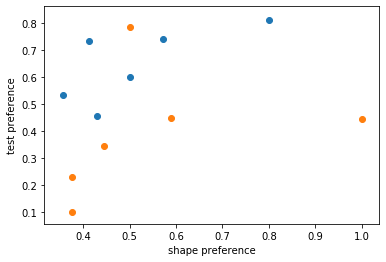

In [ ]:
plt.scatter(pref_f_s, pref_f)
plt.scatter(pref_m_s, pref_m)
plt.xlabel('shape preference')
plt.ylabel('test preference')

In [ ]:
values_table = pd.DataFrame(columns = ['animal', 'day', 'sex', 'value', 'experiment', 'metric'])

TypeError: update_values_table() got an unexpected keyword argument 'values_table'

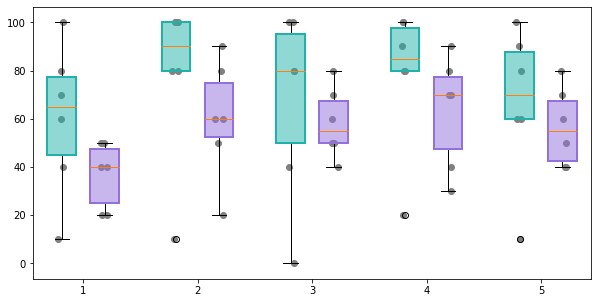

In [ ]:
######################################## door shape proportion ###########################
experiment = "Door_shape"
metric = 'door_1_lever_press_count'



ani, day, presses = lf.get_data(metric = metric, experiment= experiment, dataset = lon_ana)




press_m, press_f = presses[:6], presses[6:]



prop_m = 100*press_m / 10
prop_f = 100*press_f / 10

fig, ax = plt.subplots(figsize = (10,5))

ax.boxplot(prop_m, positions=[1,3,5,7,9],
           patch_artist=True,
           boxprops = dict(facecolor = colors_rgb['male']+(0.5,), color = colors['male'], linewidth =2))


ax.boxplot(prop_f, positions=[1.75,3.75,5.75,7.75,9.75],
           patch_artist=True,
           boxprops = dict(facecolor = colors_rgb['female']+(0.5,), color = colors['female'], linewidth =2))

for i, day_data in enumerate(np.transpose(prop_m)):
    d = i*2+1
    ax.scatter(x = random_jitter_x_values(center = d, number = 6, width = 0.3), y = day_data, color = 'gray')

for i, day_data in enumerate(np.transpose(prop_f)):
    d = i*2+1.75
    ax.scatter(x = random_jitter_x_values(center = d, number = 6, width = 0.3), y = day_data, color = 'gray')

ax.set_xticks([(i+i+0.75)/2 for i in range(1,10,2)])
ax.set_xticklabels([str(i) for i in range(1,6,1)])

values_table = update_values_table(data = presses,
                                   animal_numbers = ani,
                                   days = day, 
                                   sex_list = ['m']*6 + ['f']*6,
                                   experiment = experiment,
                                   metric = metric,
                                   values_table = values_table
                                   )


In [ ]:
values_table.to_csv('/home/dprotter/Documents/Donaldson Lab Writing/liza paper/data tables/door_1_press.csv')

Text(0, 0.5, 'Normalized Partner Pressing\npresses / day 1 presses')

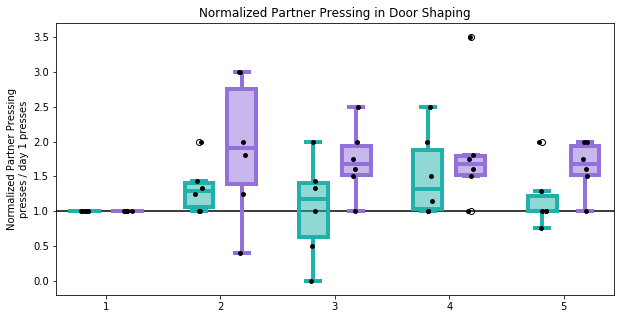

In [ ]:
######################################## door shape proportion ###########################
experiment = "Door_shape"
metric = 'door_1_lever_press_count'



ani, day, presses = lf.get_data(metric = metric, experiment= experiment, dataset = lon_ana)




press_m, press_f = presses[:6], presses[6:]



prop_m = 100*press_m / 10
prop_f = 100*press_f / 10

first_m = np.zeros((6,5))
first_f = np.zeros((6,5))

for i in range(5):
    first_m[:,i] = prop_m[:,0]
    first_f[:,i] = prop_f[:,0]
prop_m = prop_m / first_m
prop_f = prop_f / first_f
fig, ax = plt.subplots(figsize = (10,5))


lw = 4

ax.boxplot(prop_m, positions=[1,3,5,7,9],
           patch_artist=True,
           boxprops = dict(facecolor = colors_rgb['male']+(0.5,), color = colors['male'], linewidth = lw),
           medianprops = dict(color = colors['male'], linewidth = lw),
           whiskerprops= dict(color = colors['male'], linewidth = lw),
           capprops=dict(color = colors['male'], linewidth = lw))


ax.boxplot(prop_f, positions=[1.75,3.75,5.75,7.75,9.75],
           patch_artist=True,
           boxprops = dict(facecolor = colors_rgb['female']+(0.5,), color = colors['female'], linewidth =lw),
           medianprops = dict(color = colors['female'], linewidth = lw),
           whiskerprops= dict(color = colors['female'], linewidth = lw),
           capprops=dict(color = colors['female'], linewidth = lw))

for i, day_data in enumerate(np.transpose(prop_m)):
    d = i*2+1
    ax.scatter(x = random_jitter_x_values(center = d, number = 6, width = 0.3),s = 15, y = day_data, color = 'black', zorder = 10)

for i, day_data in enumerate(np.transpose(prop_f)):
    d = i*2+1.75
    ax.scatter(x = random_jitter_x_values(center = d, number = 6, width = 0.3), s = 15,y = day_data, color = 'black', zorder = 10)

ax.set_xticks([(i+i+0.75)/2 for i in range(1,10,2)])
ax.set_xticklabels([str(i) for i in range(1,6,1)])

xmin, xmax = ax.get_xbound()

ax.hlines(y = 1, xmin = xmin, xmax = xmax)
ax.set_title('Normalized Partner Pressing in Door Shaping')
ax.set_ylabel('Normalized Partner Pressing\npresses / day 1 presses')



NameError: name 'lw' is not defined

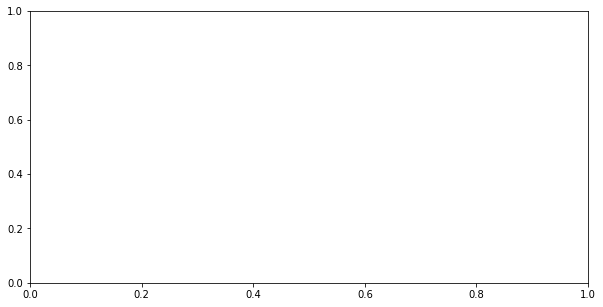

In [ ]:
######################################## door shape proportion ###########################
experiment = "Door_shape"
metric = 'door_2_lever_press_count'



ani, day, presses = lf.get_data(metric = metric, experiment= experiment, dataset = lon_ana)




press_m, press_f = presses[:6], presses[6:]



prop_m = 100*press_m / 10
prop_f = 100*press_f / 10

first_m = np.zeros((6,5))
first_f = np.zeros((6,5))

for i in range(5):
    first_m[:,i] = prop_m[:,0]
    first_f[:,i] = prop_f[:,0]
prop_m = prop_m / first_m
prop_f = prop_f / first_f
fig, ax = plt.subplots(figsize = (10,5))

ax.boxplot(prop_m, positions=[1,3,5,7,9],
           patch_artist=True,
           boxprops = dict(facecolor = colors_rgb['male']+(0.5,), color = colors['male'], linewidth = lw),
           medianprops = dict(color = colors['male'], linewidth = lw),
           whiskerprops= dict(color = colors['male'], linewidth = lw),
           capprops=dict(color = colors['male'], linewidth = lw))


ax.boxplot(prop_f, positions=[1.75,3.75,5.75,7.75,9.75],
           patch_artist=True,
           boxprops = dict(facecolor = colors_rgb['female']+(0.5,), color = colors['female'], linewidth =lw),
           medianprops = dict(color = colors['female'], linewidth = lw),
           whiskerprops= dict(color = colors['female'], linewidth = lw),
           capprops=dict(color = colors['female'], linewidth = lw))

for i, day_data in enumerate(np.transpose(prop_m)):
    d = i*2+1
    ax.scatter(x = random_jitter_x_values(center = d, number = 6, width = 0.3),s = 15, y = day_data, color = 'black', zorder = 10)

for i, day_data in enumerate(np.transpose(prop_f)):
    d = i*2+1.75
    ax.scatter(x = random_jitter_x_values(center = d, number = 6, width = 0.3), s = 15,y = day_data, color = 'black', zorder = 10)

ax.set_xticks([(i+i+0.75)/2 for i in range(1,10,2)])
ax.set_xticklabels([str(i) for i in range(1,6,1)])

xmin, xmax = ax.get_xbound()

ax.hlines(y = 1, xmin = xmin, xmax = xmax)
ax.set_title('Normalized Novel Pressing in Door Shaping')
ax.set_ylabel('Normalized Novel Pressing\npresses / day 1 presses')
update_values_table(plot_data_f, anis[6:], days = day, experiment = 'Autoshape', metric = 'median latency change')

Text(0, 0.5, 'Normalized Total Pressing\npresses / day 1 presses')

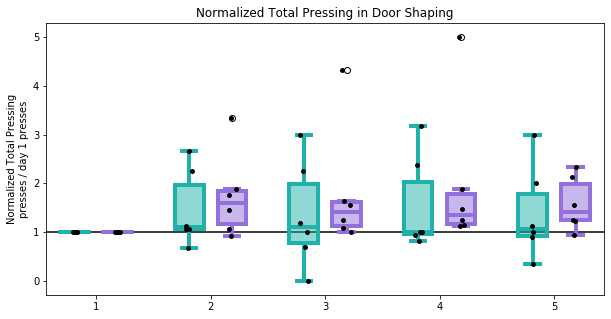

In [ ]:
######################################## door shape proportion ###########################
experiment = "Door_shape"
metric = 'total_lever_press'



ani, day, presses = lf.get_data(metric = metric, experiment= experiment, dataset = lon_ana)




press_m, press_f = presses[:6], presses[6:]



prop_m = 100*press_m / 20
prop_f = 100*press_f / 20

first_m = np.zeros((6,5))
first_f = np.zeros((6,5))

for i in range(5):
    first_m[:,i] = prop_m[:,0]
    first_f[:,i] = prop_f[:,0]
prop_m = prop_m / first_m
prop_f = prop_f / first_f
fig, ax = plt.subplots(figsize = (10,5))

ax.boxplot(prop_m, positions=[1,3,5,7,9],
           patch_artist=True,
           boxprops = dict(facecolor = colors_rgb['male']+(0.5,), color = colors['male'], linewidth = lw),
           medianprops = dict(color = colors['male'], linewidth = lw),
           whiskerprops= dict(color = colors['male'], linewidth = lw),
           capprops=dict(color = colors['male'], linewidth = lw))


ax.boxplot(prop_f, positions=[1.75,3.75,5.75,7.75,9.75],
           patch_artist=True,
           boxprops = dict(facecolor = colors_rgb['female']+(0.5,), color = colors['female'], linewidth =lw),
           medianprops = dict(color = colors['female'], linewidth = lw),
           whiskerprops= dict(color = colors['female'], linewidth = lw),
           capprops=dict(color = colors['female'], linewidth = lw))

for i, day_data in enumerate(np.transpose(prop_m)):
    d = i*2+1
    ax.scatter(x = random_jitter_x_values(center = d, number = 6, width = 0.3),s = 15, y = day_data, color = 'black', zorder = 10)

for i, day_data in enumerate(np.transpose(prop_f)):
    d = i*2+1.75
    ax.scatter(x = random_jitter_x_values(center = d, number = 6, width = 0.3), s = 15,y = day_data, color = 'black', zorder = 10)
ax.set_xticks([(i+i+0.75)/2 for i in range(1,10,2)])
ax.set_xticklabels([str(i) for i in range(1,6,1)])

xmin, xmax = ax.get_xbound()

ax.hlines(y = 1, xmin = xmin, xmax = xmax)
ax.set_title('Normalized Total Pressing in Door Shaping')
ax.set_ylabel('Normalized Total Pressing\npresses / day 1 presses')

Text(0, 0.5, 'Normalized Total Pressing\npresses / day 1 presses')

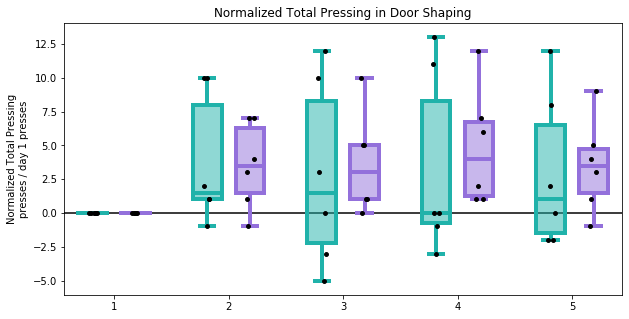

In [ ]:
######################################## door shape proportion ###########################
experiment = "Door_shape"
metric = 'total_lever_press'



ani, day, presses = lf.get_data(metric = metric, experiment= experiment, dataset = lon_ana)




press_m, press_f = presses[:6], presses[6:]



prop_m = press_m 
prop_f = press_f 

first_m = np.zeros((6,5))
first_f = np.zeros((6,5))

for i in range(5):
    first_m[:,i] = prop_m[:,0]
    first_f[:,i] = prop_f[:,0]
prop_m = prop_m - first_m
prop_f = prop_f - first_f
fig, ax = plt.subplots(figsize = (10,5))

ax.boxplot(prop_m, positions=[1,3,5,7,9],
           patch_artist=True,
           boxprops = dict(facecolor = colors_rgb['male']+(0.5,), color = colors['male'], linewidth = lw),
           medianprops = dict(color = colors['male'], linewidth = lw),
           whiskerprops= dict(color = colors['male'], linewidth = lw),
           capprops=dict(color = colors['male'], linewidth = lw))


ax.boxplot(prop_f, positions=[1.75,3.75,5.75,7.75,9.75],
           patch_artist=True,
           boxprops = dict(facecolor = colors_rgb['female']+(0.5,), color = colors['female'], linewidth =lw),
           medianprops = dict(color = colors['female'], linewidth = lw),
           whiskerprops= dict(color = colors['female'], linewidth = lw),
           capprops=dict(color = colors['female'], linewidth = lw))

for i, day_data in enumerate(np.transpose(prop_m)):
    d = i*2+1
    ax.scatter(x = random_jitter_x_values(center = d, number = 6, width = 0.3),s = 15, y = day_data, color = 'black', zorder = 10)

for i, day_data in enumerate(np.transpose(prop_f)):
    d = i*2+1.75
    ax.scatter(x = random_jitter_x_values(center = d, number = 6, width = 0.3), s = 15,y = day_data, color = 'black', zorder = 10)
ax.set_xticks([(i+i+0.75)/2 for i in range(1,10,2)])
ax.set_xticklabels([str(i) for i in range(1,6,1)])

xmin, xmax = ax.get_xbound()

ax.hlines(y = 0, xmin = xmin, xmax = xmax)
ax.set_title('Normalized Total Pressing in Door Shaping')
ax.set_ylabel('Normalized Total Pressing\npresses / day 1 presses')

Text(0, 0.5, 'nu,per of presses\n(20 trials)')

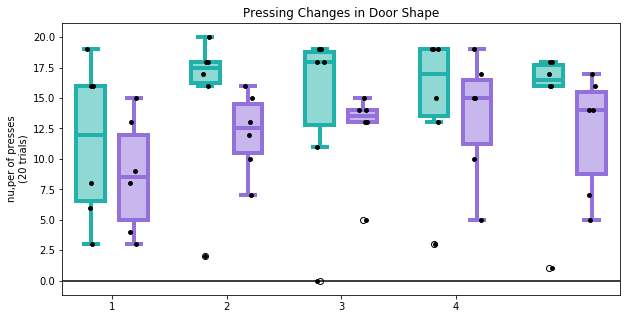

In [ ]:

####################################### autoshape shape difference ###########################
experiment = "Door_shape"
metric = 'total_lever_press'



ani, day, presses = lf.get_data(metric = metric, experiment= experiment, dataset = lon_ana)




press_m, press_f = presses[:6], presses[6:]


first_m = np.zeros((6,4))
first_f = np.zeros((6,4))

'''for i in range(4):
    first_m[:,i] = press_m[:,0]
    first_f[:,i] = press_f[:,0]
diff_m = (press_m - first_m) 
diff_f = (press_f - first_f) '''

#####



plot_data_m = press_m
plot_data_f = press_f
pos_m = [i*2+1 for i in range(len(plot_data_m[0]))]
pos_f = [el+0.75 for el in pos_m]
fig, ax = plt.subplots(figsize = (10,5))



ax.boxplot(plot_data_m, positions=pos_m,
           patch_artist=True,
           boxprops = dict(facecolor = colors_rgb['male']+(0.5,), color = colors['male'], linewidth = lw),
           medianprops = dict(color = colors['male'], linewidth = lw),
           whiskerprops= dict(color = colors['male'], linewidth = lw),
           capprops=dict(color = colors['male'], linewidth = lw))


ax.boxplot(plot_data_f, positions=pos_f,
           patch_artist=True,
           boxprops = dict(facecolor = colors_rgb['female']+(0.5,), color = colors['female'], linewidth =lw),
           medianprops = dict(color = colors['female'], linewidth = lw),
           whiskerprops= dict(color = colors['female'], linewidth = lw),
           capprops=dict(color = colors['female'], linewidth = lw))

for i, day_data in enumerate(np.transpose(plot_data_m)):
    d = i*2+1
    ax.scatter(x = random_jitter_x_values(center = d, number = 6, width = 0.3),s = 15, y = day_data, color = 'black', zorder = 10)

for i, day_data in enumerate(np.transpose(plot_data_f)):
    d = i*2+1.75
    ax.scatter(x = random_jitter_x_values(center = d, number = 6, width = 0.3), s = 15,y = day_data, color = 'black', zorder = 10)

ax.set_xticks([(i+i+0.75)/2 for i in range(1,8,2)])
ax.set_xticklabels([str(i) for i in range(1,5,1)])

xmin, xmax = ax.get_xbound()

ax.hlines(y = 0, xmin = xmin, xmax = xmax)
ax.set_title('Pressing Changes in Door Shape')
ax.set_ylabel('nu,per of presses\n(20 trials)')

In [ ]:
mets

In [ ]:
[val for val in mets.keys() if 'door_1' in val]

['door_1_lever_press_count',
 'door_1_non_press_count',
 'door_1_lever_press_round_proportion',
 'door_1_non_press_round_proportion',
 'door_1_lever_press_total_press_proportion',
 'mean_door_1_lever_press_latency',
 'median_door_1_lever_press_latency',
 'door_1_beam_breaks',
 'mean_door_1_beam_break_latency',
 'median_door_1_beam_break_latency',
 'door_1_reward_count',
 'door_1_reward_round_proportion']

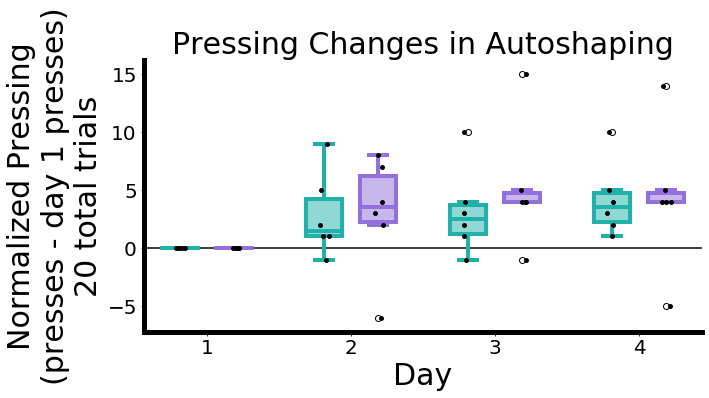

In [ ]:

####################################### autoshape shape proportion ###########################
experiment = "Autoshape"
metric = 'total_lever_press'



ani, day, presses = lf.get_data(metric = metric, experiment= experiment, dataset = lon_ana)




press_m, press_f = presses[:6], presses[6:]


first_m = np.zeros((6,4))
first_f = np.zeros((6,4))

for i in range(4):
    first_m[:,i] = press_m[:,0]
    first_f[:,i] = press_f[:,0]
diff_m = press_m - first_m
diff_f = press_f - first_f




###############33



g

xmin, xmax = ax.get_xbound()

ax.hlines(y = 0, xmin = xmin, xmax = xmax)

ax.spines['left'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(5)) 
ax.tick_params(axis = 'both', labelsize = 20)



ax.set_title('Pressing Changes in Autoshaping', fontsize = 30)
ax.set_ylabel('Normalized Pressing\n(presses - day 1 presses)\n20 total trials',fontsize = 30)
ax.set_xlabel('Day', fontsize = 30)
plt.savefig(os.path.join(output_path, 'change in pressing number autoshape.svg'))


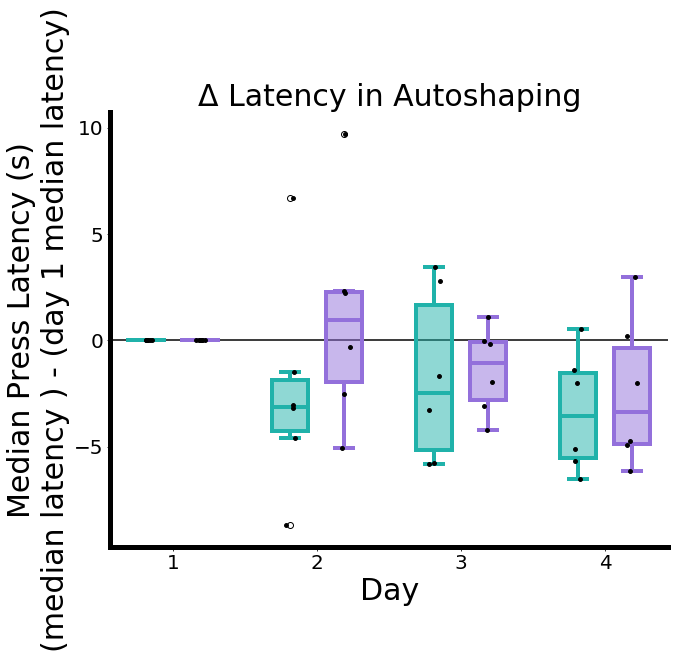

In [ ]:

####################################### autoshape shape latency difference ###########################
experiment = "Autoshape"
metric = 'median_food_lever_press_latency'



ani, day, presses = lf.get_data(metric = metric, experiment= experiment, dataset = lon_ana)




press_m, press_f = presses[:6], presses[6:]


first_m = np.zeros((6,4))
first_f = np.zeros((6,4))

for i in range(4):
    first_m[:,i] = press_m[:,0]
    first_f[:,i] = press_f[:,0]
diff_m = press_m - first_m
diff_f = press_f - first_f

##############################3


plot_data_m = diff_m
plot_data_f = diff_f
pos_m = [i*2+1 for i in range(len(plot_data_m[0]))]
pos_f = [el+0.75 for el in pos_m]
fig, ax = plt.subplots(figsize = (10,8))



ax.boxplot(plot_data_m, positions=pos_m,
           patch_artist=True,
           boxprops = dict(facecolor = colors_rgb['male']+(0.5,), color = colors['male'], linewidth = lw),
           medianprops = dict(color = colors['male'], linewidth = lw),
           whiskerprops= dict(color = colors['male'], linewidth = lw),
           capprops=dict(color = colors['male'], linewidth = lw))


ax.boxplot(plot_data_f, positions=pos_f,
           patch_artist=True,
           boxprops = dict(facecolor = colors_rgb['female']+(0.5,), color = colors['female'], linewidth =lw),
           medianprops = dict(color = colors['female'], linewidth = lw),
           whiskerprops= dict(color = colors['female'], linewidth = lw),
           capprops=dict(color = colors['female'], linewidth = lw))

for i, day_data in enumerate(np.transpose(plot_data_m)):
    d = i*2+1
    ax.scatter(x = random_jitter_x_values(center = d, number = 6, width = 0.3),s = 15, y = day_data, color = 'black', zorder = 10)

for i, day_data in enumerate(np.transpose(plot_data_f)):
    d = i*2+1.75
    ax.scatter(x = random_jitter_x_values(center = d, number = 6, width = 0.3), s = 15,y = day_data, color = 'black', zorder = 10)

ax.set_xticks([(i+i+0.75)/2 for i in range(1,8,2)])
ax.set_xticklabels([str(i) for i in range(1,5,1)])

xmin, xmax = ax.get_xbound()

ax.hlines(y = 0, xmin = xmin, xmax = xmax)

ax.spines['left'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(5)) 
ax.tick_params(axis = 'both', labelsize = 20)



ax.set_title('Δ Latency in Autoshaping', fontsize = 30)
ax.set_ylabel('Median Press Latency (s)\n(median latency ) - (day 1 median latency)',fontsize = 30)
ax.set_xlabel('Day', fontsize = 30)
plt.savefig(os.path.join(output_path, 'autoshape median press latency difference.svg'))


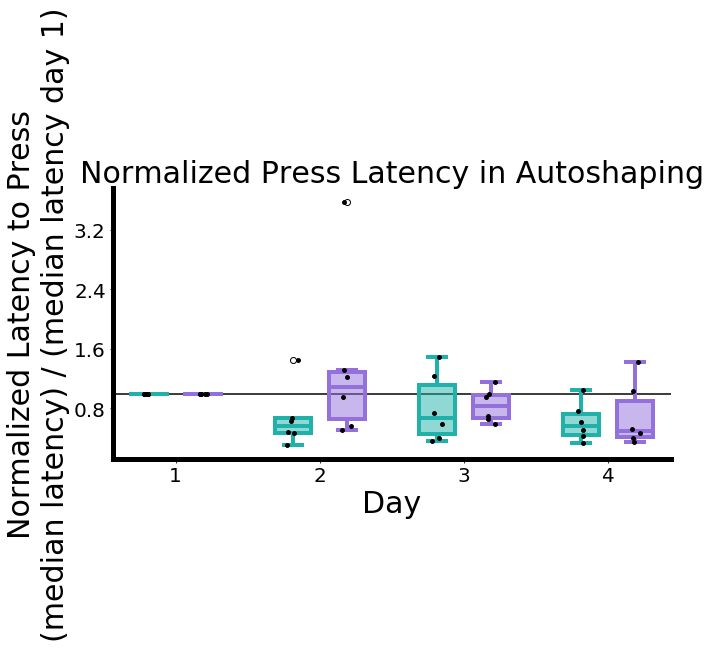

In [ ]:


####################################### autoshape norm change in  ###########################
experiment = "Autoshape"
metric = 'median_food_lever_press_latency'



ani, day, medians = lf.get_data(metric = metric, experiment= experiment, dataset = lon_ana)




med_m, med_f = medians[:6], medians[6:]





first_f = np.zeros((6,4))
first_m = np.zeros((6,4))

for i in range(len(med_m[0])):
    first_m[:,i] = med_m[:,0]
    first_f[:,i] = med_f[:,0]
    
    
norm_m = med_m / first_m
norm_f = med_f / first_f


###############

plot_data_m = norm_m
plot_data_f = norm_f
pos_m = [i*2+1 for i in range(len(plot_data_m[0]))]
pos_f = [el+0.75 for el in pos_m]
fig, ax = plt.subplots(figsize = (10,5))

ax.boxplot(plot_data_m, positions=pos_m,
           patch_artist=True,
           boxprops = dict(facecolor = colors_rgb['male']+(0.5,), color = colors['male'], linewidth = lw),
           medianprops = dict(color = colors['male'], linewidth = lw),
           whiskerprops= dict(color = colors['male'], linewidth = lw),
           capprops=dict(color = colors['male'], linewidth = lw))


ax.boxplot(plot_data_f, positions=pos_f,
           patch_artist=True,
           boxprops = dict(facecolor = colors_rgb['female']+(0.5,), color = colors['female'], linewidth =lw),
           medianprops = dict(color = colors['female'], linewidth = lw),
           whiskerprops= dict(color = colors['female'], linewidth = lw),
           capprops=dict(color = colors['female'], linewidth = lw))

for i, day_data in enumerate(np.transpose(plot_data_m)):
    d = i*2+1
    ax.scatter(x = random_jitter_x_values(center = d, number = 6, width = 0.3),s = 15, y = day_data, color = 'black', zorder = 10)

for i, day_data in enumerate(np.transpose(plot_data_f)):
    d = i*2+1.75
    ax.scatter(x = random_jitter_x_values(center = d, number = 6, width = 0.3), s = 15,y = day_data, color = 'black', zorder = 10)

ax.set_xticks([(em +ef)/2 for em, ef in zip(pos_m, pos_f)])
ax.set_xticklabels([str(i) for i in range(1,len(pos_m)+1,1)])

xmin, xmax = ax.get_xbound()

ax.hlines(y = 1, xmin = xmin, xmax = xmax)

ax.spines['left'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(5)) 
ax.tick_params(axis = 'both', labelsize = 20)

ax.set_xlabel('Day', fontsize = 30)

ax.set_title('Normalized Press Latency in Autoshaping', fontsize = 30)
ax.set_ylabel('Normalized Latency to Press\n(median latency) / (median latency day 1)',fontsize = 30)

plt.savefig(os.path.join(output_path, 'autoshape median press latency difference.svg'))

<ipython-input-45-f1d7a46e25a9>:16: RuntimeWarning:

invalid value encountered in true_divide



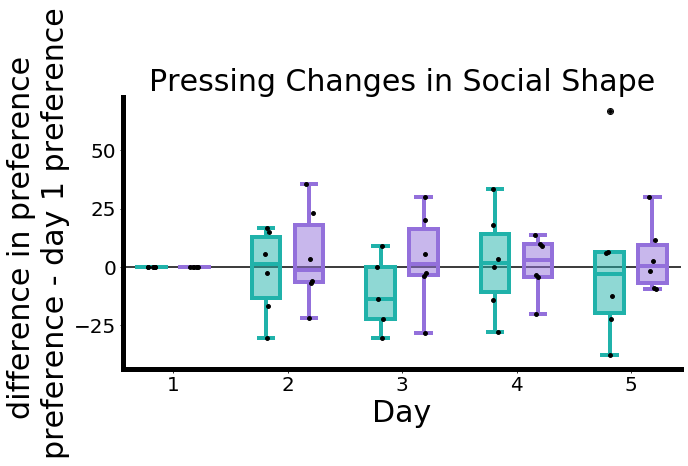

In [ ]:


####################################### Door_shape  proportion ###########################
experiment = "Door_shape"
metric = 'door_1_lever_press_count'

ani, day, presses_d1 = lf.get_data(metric = metric, experiment= experiment, dataset = lon_ana)

metric = 'door_2_lever_press_count'
ani, day, presses_d2 = lf.get_data(metric = metric, experiment= experiment, dataset = lon_ana)



press_m1, press_f1 = presses_d1[:6], presses_d1[6:]
press_m2, press_f2 = presses_d2[:6], presses_d2[6:]


pref_m = 100*press_m1 / (press_m2 + press_m1)
pref_f = 100*press_f1 / (press_f2 + press_f1)


num_days = len(pref_m[0])
first_m = np.zeros((6,num_days))
first_f = np.zeros((6,num_days))

for i in range(len(pref_m[0])):
    first_m[:,i] = pref_m[:,0]
    first_f[:,i] = pref_f[:,0]
diff_m = pref_m - first_m
diff_f = pref_f - first_f



###############



plot_data_m = diff_m
plot_data_f = diff_f
pos_m = [i*2+1 for i in range(len(plot_data_m[0]))]
pos_f = [el+0.75 for el in pos_m]
fig, ax = plt.subplots(figsize = (10,5))

########-------- specifically need to deal with nan value ------ ############
for day_data, position in zip(np.transpose(diff_m), pos_m):
    ax.boxplot(day_data[~np.isnan(day_data)], positions=[position],
            patch_artist=True,
            widths =[0.5],
            boxprops = dict(facecolor = colors_rgb['male']+(0.5,), color = colors['male'], linewidth = lw),
            medianprops = dict(color = colors['male'], linewidth = lw),
            whiskerprops= dict(color = colors['male'], linewidth = lw),
            capprops=dict(color = colors['male'], linewidth = lw))


ax.boxplot(plot_data_f, positions=pos_f,
           patch_artist=True,
           boxprops = dict(facecolor = colors_rgb['female']+(0.5,), color = colors['female'], linewidth =lw),
           medianprops = dict(color = colors['female'], linewidth = lw),
           whiskerprops= dict(color = colors['female'], linewidth = lw),
           capprops=dict(color = colors['female'], linewidth = lw))

for i, day_data in enumerate(np.transpose(plot_data_m)):
    d = i*2+1
    ax.scatter(x = random_jitter_x_values(center = d, number = 6, width = 0.3),s = 15, y = day_data, color = 'black', zorder = 10)

for i, day_data in enumerate(np.transpose(plot_data_f)):
    d = i*2+1.75
    ax.scatter(x = random_jitter_x_values(center = d, number = 6, width = 0.3), s = 15,y = day_data, color = 'black', zorder = 10)
ax.set_xticks([(i+i+0.75)/2 for i in range(1,2*len(pos_m),2)])
ax.set_xticklabels([str(i) for i in range(1,1+len(pos_m),1)])

xmin, xmax = ax.get_xbound()

ax.hlines(y = 0, xmin = xmin, xmax = xmax)

ax.spines['left'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(5)) 
ax.tick_params(axis = 'both', labelsize = 20)



ax.set_title('Pressing Changes in Social Shape', fontsize = 30)
ax.set_ylabel('difference in preference \npreference - day 1 preference',fontsize = 30)
ax.set_xlabel('Day', fontsize = 30)

plt.savefig(os.path.join(output_path, 'change in percent pref social shape.pdf'))

<ipython-input-21-1a65da3944c3>:16: RuntimeWarning:

invalid value encountered in true_divide



NameError: name 'output_path' is not defined

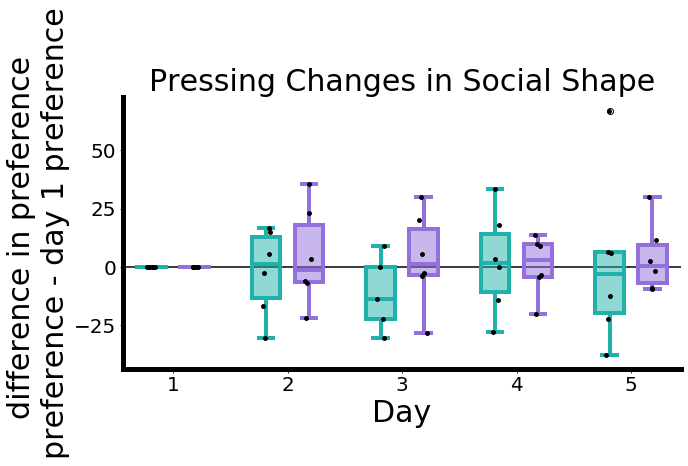

In [ ]:


####################################### Door_shape  proportion ###########################
experiment = "Door_shape"
metric = 'door_1_lever_press_count'

ani, day, presses_d1 = lf.get_data(metric = metric, experiment= experiment, dataset = lon_ana)

metric = 'door_2_lever_press_count'
ani, day, presses_d2 = lf.get_data(metric = metric, experiment= experiment, dataset = lon_ana)



press_m1, press_f1 = presses_d1[:6], presses_d1[6:]
press_m2, press_f2 = presses_d2[:6], presses_d2[6:]


pref_m = 100*press_m1 / (press_m2 + press_m1)
pref_f = 100*press_f1 / (press_f2 + press_f1)


num_days = len(pref_m[0])
first_m = np.zeros((6,num_days))
first_f = np.zeros((6,num_days))

for i in range(len(pref_m[0])):
    first_m[:,i] = pref_m[:,0]
    first_f[:,i] = pref_f[:,0]
diff_m = pref_m - first_m
diff_f = pref_f - first_f



###############



plot_data_m = diff_m
plot_data_f = diff_f
pos_m = [i*2+1 for i in range(len(plot_data_m[0]))]
pos_f = [el+0.75 for el in pos_m]
fig, ax = plt.subplots(figsize = (10,5))

########-------- specifically need to deal with nan value ------ ############
for day_data, position in zip(np.transpose(diff_m), pos_m):
    ax.boxplot(day_data[~np.isnan(day_data)], positions=[position],
            patch_artist=True,
            widths =[0.5],
            boxprops = dict(facecolor = colors_rgb['male']+(0.5,), color = colors['male'], linewidth = lw),
            medianprops = dict(color = colors['male'], linewidth = lw),
            whiskerprops= dict(color = colors['male'], linewidth = lw),
            capprops=dict(color = colors['male'], linewidth = lw))


ax.boxplot(plot_data_f, positions=pos_f,
           patch_artist=True,
           boxprops = dict(facecolor = colors_rgb['female']+(0.5,), color = colors['female'], linewidth =lw),
           medianprops = dict(color = colors['female'], linewidth = lw),
           whiskerprops= dict(color = colors['female'], linewidth = lw),
           capprops=dict(color = colors['female'], linewidth = lw))

for i, day_data in enumerate(np.transpose(plot_data_m)):
    d = i*2+1
    ax.scatter(x = random_jitter_x_values(center = d, number = 6, width = 0.3),s = 15, y = day_data, color = 'black', zorder = 10)

for i, day_data in enumerate(np.transpose(plot_data_f)):
    d = i*2+1.75
    ax.scatter(x = random_jitter_x_values(center = d, number = 6, width = 0.3), s = 15,y = day_data, color = 'black', zorder = 10)
ax.set_xticks([(i+i+0.75)/2 for i in range(1,2*len(pos_m),2)])
ax.set_xticklabels([str(i) for i in range(1,1+len(pos_m),1)])

xmin, xmax = ax.get_xbound()

ax.hlines(y = 0, xmin = xmin, xmax = xmax)

ax.spines['left'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(5)) 
ax.tick_params(axis = 'both', labelsize = 20)



ax.set_title('Pressing Changes in Social Shape', fontsize = 30)
ax.set_ylabel('difference in preference \npreference - day 1 preference',fontsize = 30)
ax.set_xlabel('Day', fontsize = 30)
plt.savefig(os.path.join(output_path, 'change in percent pref social shape.svg'))

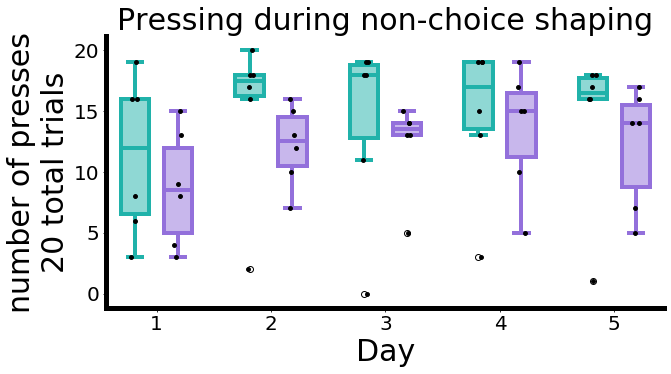

In [ ]:
####################################### Door_shape num presses ###########################
experiment = "Door_shape"
metric = 'total_lever_press'


ani, day, presses_d1 = lf.get_data(metric = metric, experiment= experiment, dataset = lon_ana)

press_m1, press_f1 = presses_d1[:6], presses_d1[6:]


###############



plot_data_m = press_m1
plot_data_f = press_f1
pos_m = [i*2+1 for i in range(len(plot_data_m[0]))]
pos_f = [el+0.75 for el in pos_m]
fig, ax = plt.subplots(figsize = (10,5))

########-------- specifically need to deal with nan value ------ ############
for day_data, position in zip(np.transpose(plot_data_m), pos_m):
    ax.boxplot(day_data[~np.isnan(day_data)], positions=[position],
            patch_artist=True,
            widths = [0.5],
            boxprops = dict(facecolor = colors_rgb['male']+(0.5,), color = colors['male'], linewidth = lw),
            medianprops = dict(color = colors['male'], linewidth = lw),
            whiskerprops= dict(color = colors['male'], linewidth = lw),
            capprops=dict(color = colors['male'], linewidth = lw))


ax.boxplot(plot_data_f, positions=pos_f,
           patch_artist=True,
           boxprops = dict(facecolor = colors_rgb['female']+(0.5,), color = colors['female'], linewidth =lw),
           medianprops = dict(color = colors['female'], linewidth = lw),
           whiskerprops= dict(color = colors['female'], linewidth = lw),
           capprops=dict(color = colors['female'], linewidth = lw))

for i, day_data in enumerate(np.transpose(plot_data_m)):
    d = i*2+1
    ax.scatter(x = random_jitter_x_values(center = d, number = 6, width = 0.3),s = 15, y = day_data, color = 'black', zorder = 10)

for i, day_data in enumerate(np.transpose(plot_data_f)):
    d = i*2+1.75
    ax.scatter(x = random_jitter_x_values(center = d, number = 6, width = 0.3), s = 15,y = day_data, color = 'black', zorder = 10)
ax.set_xticks([(i+i+0.75)/2 for i in range(1,2*len(pos_m),2)])
ax.set_xticklabels([str(i) for i in range(1,1+len(pos_m),1)])

xmin, xmax = ax.get_xbound()


ax.spines['left'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(5)) 
ax.tick_params(axis = 'both', labelsize = 20)


ax.set_title('Pressing during non-choice shaping', fontsize = 30)
ax.set_ylabel('number of presses\n20 total trials',fontsize = 30)
ax.set_xlabel('Day', fontsize = 30)
output_path = '/home/dprotter/Documents/Vole Projects/random plots/plots for liza'
plt.savefig(os.path.join(output_path, 'social shape num presses over days.pdf'),bbox_inches = 'tight')

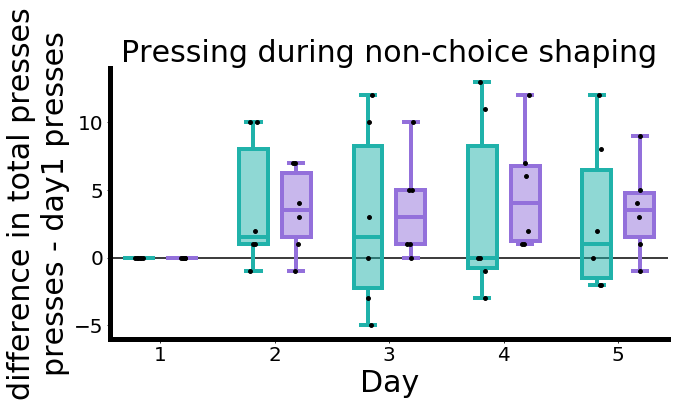

In [ ]:

####################################### Door_shape num presses difference ###########################
experiment = "Door_shape"
metric = 'total_lever_press'


ani, day, presses_d1 = lf.get_data(metric = metric, experiment= experiment, dataset = lon_ana)

press_m1, press_f1 = presses_d1[:6], presses_d1[6:]

num_days = len(press_m1[0])
first_m = np.zeros((6,num_days))
first_f = np.zeros((6,num_days))

for i in range(len(press_m1[0])):
    first_m[:,i] = press_m1[:,0]
    first_f[:,i] = press_f1[:,0]
diff_m = press_m1 - first_m
diff_f = press_f1 - first_f

###############



plot_data_m = diff_m
plot_data_f = diff_f
pos_m = [i*2+1 for i in range(len(plot_data_m[0]))]
pos_f = [el+0.75 for el in pos_m]
fig, ax = plt.subplots(figsize = (10,5))

########-------- specifically need to deal with nan value ------ ############
for day_data, position in zip(np.transpose(plot_data_m), pos_m):
    ax.boxplot(day_data[~np.isnan(day_data)], positions=[position],
            patch_artist=True,
            widths = [0.5],
            boxprops = dict(facecolor = colors_rgb['male']+(0.5,), color = colors['male'], linewidth = lw),
            medianprops = dict(color = colors['male'], linewidth = lw),
            whiskerprops= dict(color = colors['male'], linewidth = lw),
            capprops=dict(color = colors['male'], linewidth = lw))


ax.boxplot(plot_data_f, positions=pos_f,
           patch_artist=True,
           boxprops = dict(facecolor = colors_rgb['female']+(0.5,), color = colors['female'], linewidth =lw),
           medianprops = dict(color = colors['female'], linewidth = lw),
           whiskerprops= dict(color = colors['female'], linewidth = lw),
           capprops=dict(color = colors['female'], linewidth = lw))

for i, day_data in enumerate(np.transpose(plot_data_m)):
    d = i*2+1
    ax.scatter(x = random_jitter_x_values(center = d, number = 6, width = 0.3),s = 15, y = day_data, color = 'black', zorder = 10)

for i, day_data in enumerate(np.transpose(plot_data_f)):
    d = i*2+1.75
    ax.scatter(x = random_jitter_x_values(center = d, number = 6, width = 0.3), s = 15,y = day_data, color = 'black', zorder = 10)
ax.set_xticks([(i+i+0.75)/2 for i in range(1,2*len(pos_m),2)])
ax.set_xticklabels([str(i) for i in range(1,1+len(pos_m),1)])

xmin, xmax = ax.get_xbound()
ax.hlines(y = 0, xmin = xmin, xmax = xmax)


ax.spines['left'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(5)) 
ax.tick_params(axis = 'both', labelsize = 20)


ax.set_title('Pressing during non-choice shaping', fontsize = 30)
ax.set_ylabel('difference in total presses\npresses - day1 presses',fontsize = 30)
ax.set_xlabel('Day', fontsize = 30)
output_path = '/home/dprotter/Documents/Vole Projects/random plots/plots for liza'
plt.savefig(os.path.join(output_path, 'social shape num press difference over days.pdf'),bbox_inches = 'tight')

/home/dprotter/anaconda3/envs/computing/lib/python3.8/site-packages/pingouin/effsize.py:680: RuntimeWarning:

invalid value encountered in double_scalars

/home/dprotter/anaconda3/envs/computing/lib/python3.8/site-packages/pingouin/effsize.py:680: RuntimeWarning:

invalid value encountered in double_scalars



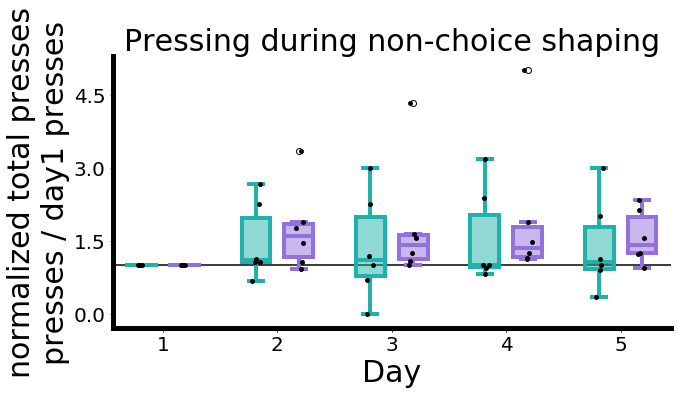

In [ ]:

####################################### Door_shape num presses normalized ###########################
experiment = "Door_shape"
metric = 'total_lever_press'


ani, day, presses_d1 = lf.get_data(metric = metric, experiment= experiment, dataset = lon_ana)

press_m1, press_f1 = presses_d1[:6], presses_d1[6:]

num_days = len(press_m1[0])
first_m = np.zeros((6,num_days))
first_f = np.zeros((6,num_days))

for i in range(len(press_m1[0])):
    first_m[:,i] = press_m1[:,0]
    first_f[:,i] = press_f1[:,0]
diff_m = press_m1 / first_m
diff_f = press_f1 / first_f

###############



plot_data_m = diff_m
plot_data_f = diff_f
pos_m = [i*2+1 for i in range(len(plot_data_m[0]))]
pos_f = [el+0.75 for el in pos_m]
fig, ax = plt.subplots(figsize = (10,5))

########-------- specifically need to deal with nan value ------ ############
stats = pd.DataFrame()
long_form = pd.DataFrame()
for i, day_data, position in zip(range(1,len(pos_m)+1),np.transpose(plot_data_m), pos_m):
    ax.boxplot(day_data[~np.isnan(day_data)], positions=[position],
            patch_artist=True,
            widths = [0.5],
            boxprops = dict(facecolor = colors_rgb['male']+(0.5,), color = colors['male'], linewidth = lw),
            medianprops = dict(color = colors['male'], linewidth = lw),
            whiskerprops= dict(color = colors['male'], linewidth = lw),
            capprops=dict(color = colors['male'], linewidth = lw))

    out = pg.ttest(day_data, 1)
    out['sex'] = 'm'
    out['day'] = i 
    stats = pd.concat((stats, out))   
    tmp = pd.DataFrame({})

for i, day_data, position in zip(range(1,len(pos_f)+1),np.transpose(plot_data_f), pos_f):
    ax.boxplot(day_data[~np.isnan(day_data)], positions=[position],
            patch_artist=True,
            widths = [0.5],
            boxprops = dict(facecolor = colors_rgb['female']+(0.5,), color = colors['female'], linewidth = lw),
            medianprops = dict(color = colors['female'], linewidth = lw),
            whiskerprops= dict(color = colors['female'], linewidth = lw),
            capprops=dict(color = colors['female'], linewidth = lw))
    
    out = pg.ttest(day_data, 1)
    out['sex'] = 'f'
    out['day'] = i 
    stats = pd.concat((stats, out))   

for i, day_data in enumerate(np.transpose(plot_data_m)):
    d = i*2+1
    ax.scatter(x = random_jitter_x_values(center = d, number = 6, width = 0.3),s = 15, y = day_data, color = 'black', zorder = 10)

for i, day_data in enumerate(np.transpose(plot_data_f)):
    d = i*2+1.75
    ax.scatter(x = random_jitter_x_values(center = d, number = 6, width = 0.3), s = 15,y = day_data, color = 'black', zorder = 10)
ax.set_xticks([(i+i+0.75)/2 for i in range(1,2*len(pos_m),2)])
ax.set_xticklabels([str(i) for i in range(1,1+len(pos_m),1)])

xmin, xmax = ax.get_xbound()
ax.hlines(y = 1, xmin = xmin, xmax = xmax)


ax.spines['left'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(5)) 
ax.tick_params(axis = 'both', labelsize = 20)


ax.set_title('Pressing during non-choice shaping', fontsize = 30)
ax.set_ylabel('normalized total presses\npresses / day1 presses',fontsize = 30)
ax.set_xlabel('Day', fontsize = 30)
output_path = '/home/dprotter/Documents/Vole Projects/random plots/plots for liza'
plt.savefig(os.path.join(output_path, 'social shape num press normalized over days.pdf'),bbox_inches = 'tight')

stats.to_csv(os.path.join(output_path, 'social shape num press normalized over days.csv'))


#####################anova stats 
num_days = len(presses_d1[0])
first = np.zeros((len(presses_d1),num_days))

for i in range(len(presses_d1[0])):
    first[:,i] = presses_d1[:,0]

norm = presses_d1 / first



vt = update_values_table(data = norm, 
                                   days = days, 
                                   animal_numbers= ani, 
                                   sex_list = ['m']*6+['f']*6,
                                   experiment = experiment,
                                   metric = 'normed total presses',
                                   values_table = vt)

aov = pg.mixed_anova(dv='value', within = 'day', between = 'sex',
                subject='animal', data=vt, effsize='np2')

aov_1 = pd.DataFrame(aov)

posthocs = pg.pairwise_ttests(dv='value', within=['day'], between = 'sex', subject='animal', #can switch order of timepoint and sex to get opposite comparisons
                                padjust='bonf', data=vt, effsize='eta-square')
posthocs_1 = pd.DataFrame(posthocs)



fpath_base = '/home/dprotter/Documents/Donaldson Lab Writing/liza paper/data tables/stats_output_2'
fname = f'{experiment}_normalized_total presses_aov.csv'
aov_1.to_csv(os.path.join(fpath_base, fname))
fname = f'{experiment}_normalized_total presses_posthocs.csv'
posthocs_1.to_csv(os.path.join(fpath_base, fname))


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,sex,1.776991,1,10,1.776991,0.168085,0.690465,NaN,0.016531,NaN,NaN,NaN,NaN
1,day,18.566086,4,40,4.641522,3.898795,0.009134,0.028505,0.280513,0.500343,False,0.149946,0.03941
2,Interaction,1.018704,4,40,0.254676,0.213923,0.929171,NaN,0.020944,NaN,NaN,NaN,NaN


,animal,day,sex,value,experiment,metric
0,4139,1,m,8.0,Door_shape,partner presses
1,4139,2,m,18.0,Door_shape,partner presses
2,4139,3,m,18.0,Door_shape,partner presses
3,4139,4,m,19.0,Door_shape,partner presses
4,4139,5,m,16.0,Door_shape,partner presses
5,4140,1,m,6.0,Door_shape,partner presses
6,4140,2,m,16.0,Door_shape,partner presses
7,4140,3,m,18.0,Door_shape,partner presses
8,4140,4,m,19.0,Door_shape,partner presses
9,4140,5,m,18.0,Door_shape,partner presses


<ipython-input-98-91f99d9620eb>:16: RuntimeWarning:

invalid value encountered in true_divide



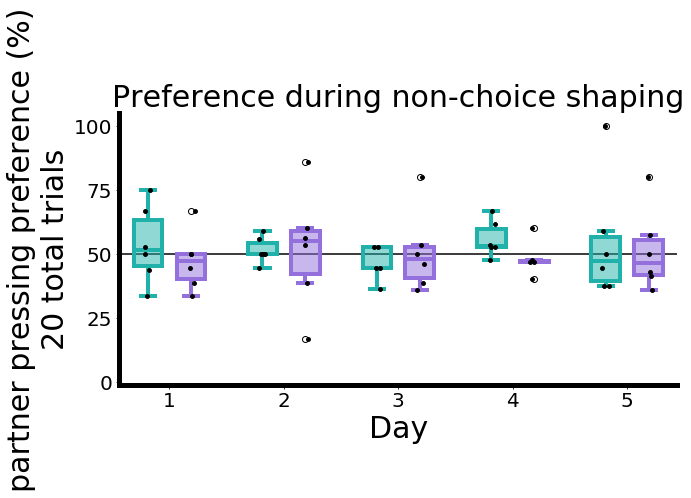

In [ ]:


####################################### Door_shape  preference ###########################
experiment = "Door_shape"
metric = 'door_1_lever_press_count'

ani, day, presses_d1 = lf.get_data(metric = metric, experiment= experiment, dataset = lon_ana)

metric = 'door_2_lever_press_count'
ani, day, presses_d2 = lf.get_data(metric = metric, experiment= experiment, dataset = lon_ana)



press_m1, press_f1 = presses_d1[:6], presses_d1[6:]
press_m2, press_f2 = presses_d2[:6], presses_d2[6:]


pref_m = 100*press_m1 / (press_m2 + press_m1)
pref_f = 100*press_f1 / (press_f2 + press_f1)




###############



plot_data_m = pref_m
plot_data_f = pref_f
pos_m = [i*2+1 for i in range(len(plot_data_m[0]))]
pos_f = [el+0.75 for el in pos_m]
fig, ax = plt.subplots(figsize = (10,5))

########-------- specifically need to deal with nan value ------ ############
stats = pd.DataFrame()
for i, day_data, position in zip(range(1,len(pos_m)+1),np.transpose(plot_data_m), pos_m):
    ax.boxplot(day_data[~np.isnan(day_data)], positions=[position],
            patch_artist=True,
            widths = [0.5],
            boxprops = dict(facecolor = colors_rgb['male']+(0.5,), color = colors['male'], linewidth = lw),
            medianprops = dict(color = colors['male'], linewidth = lw),
            whiskerprops= dict(color = colors['male'], linewidth = lw),
            capprops=dict(color = colors['male'], linewidth = lw))

    out = pg.ttest(day_data, 50)
    out['sex'] = 'm'
    out['day'] = i 
    stats = pd.concat((stats, out))   


for i, day_data, position in zip(range(1,len(pos_f)+1),np.transpose(plot_data_f), pos_f):
    ax.boxplot(day_data[~np.isnan(day_data)], positions=[position],
            patch_artist=True,
            widths = [0.5],
            boxprops = dict(facecolor = colors_rgb['female']+(0.5,), color = colors['female'], linewidth = lw),
            medianprops = dict(color = colors['female'], linewidth = lw),
            whiskerprops= dict(color = colors['female'], linewidth = lw),
            capprops=dict(color = colors['female'], linewidth = lw))

    out = pg.ttest(day_data, 50)
    out['sex'] = 'f'
    out['day'] = i 
    stats = pd.concat((stats, out))

for i, day_data in enumerate(np.transpose(plot_data_m)):
    d = i*2+1
    ax.scatter(x = random_jitter_x_values(center = d, number = 6, width = 0.3),s = 15, y = day_data, color = 'black', zorder = 10)

for i, day_data in enumerate(np.transpose(plot_data_f)):
    d = i*2+1.75
    ax.scatter(x = random_jitter_x_values(center = d, number = 6, width = 0.3), s = 15,y = day_data, color = 'black', zorder = 10)
ax.set_xticks([(i+i+0.75)/2 for i in range(1,2*len(pos_m),2)])
ax.set_xticklabels([str(i) for i in range(1,1+len(pos_m),1)])

xmin, xmax = ax.get_xbound()

ax.hlines(y = 50, xmin = xmin, xmax = xmax)

ax.spines['left'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(5)) 
ax.tick_params(axis = 'both', labelsize = 20)
ax.set_ybound((-1, 105))

ax.set_title('Preference during non-choice shaping', fontsize = 30)
ax.set_ylabel('partner pressing preference (%)\n20 total trials',fontsize = 30)
ax.set_xlabel('Day', fontsize = 30)
output_path = '/home/dprotter/Documents/Vole Projects/random plots/plots for liza'
plt.savefig(os.path.join(output_path, 'preference percent social shape over days.pdf'),bbox_inches = 'tight')

stats.to_csv('/home/dprotter/Documents/Donaldson Lab Writing/liza paper/data tables/social shape 1sample ttests by day.csv')

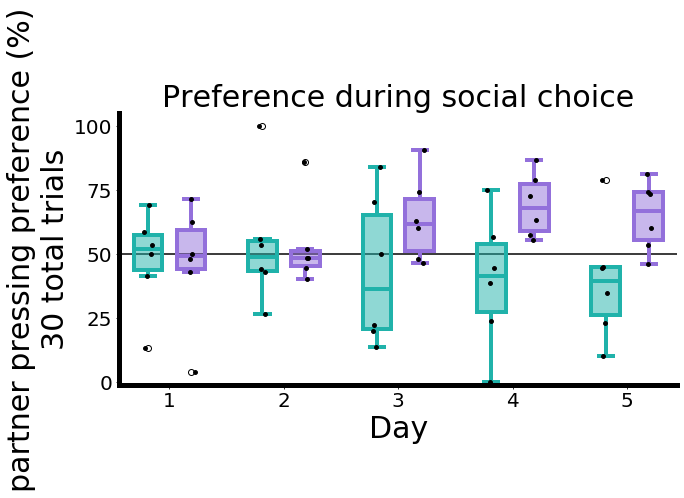

In [ ]:
####################################### Door_shape  preference ###########################
experiment = "Door_test"
metric = 'door_1_lever_press_count'

ani, day, presses_d1 = lf.get_data(metric = metric, experiment= experiment, dataset = lon_ana)

metric = 'door_2_lever_press_count'
ani, day, presses_d2 = lf.get_data(metric = metric, experiment= experiment, dataset = lon_ana)



press_m1, press_f1 = presses_d1[:6], presses_d1[6:]
press_m2, press_f2 = presses_d2[:6], presses_d2[6:]


pref_m = 100*press_m1 / (press_m2 + press_m1)
pref_f = 100*press_f1 / (press_f2 + press_f1)




###############



plot_data_m = pref_m
plot_data_f = pref_f
pos_m = [i*2+1 for i in range(len(plot_data_m[0]))]
pos_f = [el+0.75 for el in pos_m]
fig, ax = plt.subplots(figsize = (10,5))
stats = pd.DataFrame()
########-------- specifically need to deal with nan value ------ ############

for i, day_data, position in zip(range(1,len(pos_m)+1),np.transpose(plot_data_m), pos_m):
    ax.boxplot(day_data[~np.isnan(day_data)], positions=[position],
            patch_artist=True,
            widths = [0.5],
            boxprops = dict(facecolor = colors_rgb['male']+(0.5,), color = colors['male'], linewidth = lw),
            medianprops = dict(color = colors['male'], linewidth = lw),
            whiskerprops= dict(color = colors['male'], linewidth = lw),
            capprops=dict(color = colors['male'], linewidth = lw))

    out = pg.ttest(day_data, 50)
    out['sex'] = 'm'
    out['day'] = i 
    stats = pd.concat((stats, out))   


for i, day_data, position in zip(range(1,len(pos_f)+1),np.transpose(plot_data_f), pos_f):
    ax.boxplot(day_data[~np.isnan(day_data)], positions=[position],
            patch_artist=True,
            widths = [0.5],
            boxprops = dict(facecolor = colors_rgb['female']+(0.5,), color = colors['female'], linewidth = lw),
            medianprops = dict(color = colors['female'], linewidth = lw),
            whiskerprops= dict(color = colors['female'], linewidth = lw),
            capprops=dict(color = colors['female'], linewidth = lw))

    out = pg.ttest(day_data, 50)
    out['sex'] = 'f'
    out['day'] = i 
    stats = pd.concat((stats, out))

for i, day_data in enumerate(np.transpose(plot_data_m)):
    d = i*2+1
    ax.scatter(x = random_jitter_x_values(center = d, number = 6, width = 0.3),s = 15, y = day_data, color = 'black', zorder = 10)

for i, day_data in enumerate(np.transpose(plot_data_f)):
    d = i*2+1.75
    ax.scatter(x = random_jitter_x_values(center = d, number = 6, width = 0.3), s = 15,y = day_data, color = 'black', zorder = 10)
ax.set_xticks([(i+i+0.75)/2 for i in range(1,2*len(pos_m),2)])
ax.set_xticklabels([str(i) for i in range(1,1+len(pos_m),1)])

xmin, xmax = ax.get_xbound()

ax.hlines(y = 50, xmin = xmin, xmax = xmax)

ax.spines['left'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(5)) 
ax.tick_params(axis = 'both', labelsize = 20)

ax.set_ybound((-1, 105))

ax.set_title('Preference during social choice', fontsize = 30)
ax.set_ylabel('partner pressing preference (%)\n30 total trials',fontsize = 30)
ax.set_xlabel('Day', fontsize = 30)
output_path = '/home/dprotter/Documents/Vole Projects/random plots/plots for liza'
#plt.savefig(os.path.join(output_path, 'preference percent social test over days.pdf'), bbox_inches = 'tight')
stats.to_csv('/home/dprotter/Documents/Donaldson Lab Writing/liza paper/data tables/social choice 1sample ttests by day.csv')

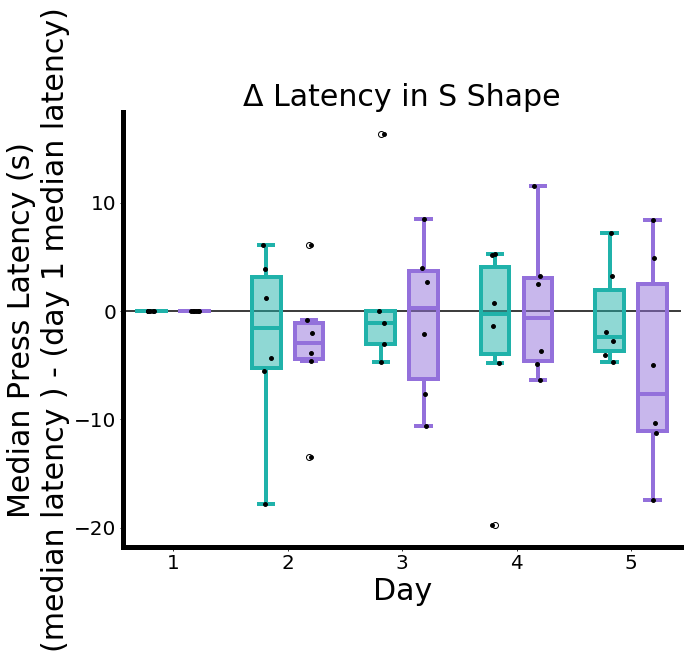

In [ ]:
####################################### door shape latency difference ###########################
experiment = "Door_shape"
metric = 'median_door_1_lever_press_latency'



ani, day, presses = lf.get_data(metric = metric, experiment= experiment, dataset = lon_ana)




press_m, press_f = presses[:6], presses[6:]


first_m = np.zeros((6,len(press_m[0])))
first_f = np.zeros((6,len(press_m[0])))

for i in range(5):
    first_m[:,i] = press_m[:,0]
    first_f[:,i] = press_f[:,0]
diff_m = press_m - first_m
diff_f = press_f - first_f






##############################3


plot_data_m = diff_m
plot_data_f = diff_f
pos_m = [i*2+1 for i in range(len(plot_data_m[0]))]
pos_f = [el+0.75 for el in pos_m]
fig, ax = plt.subplots(figsize = (10,8))



for day_data, position in zip(np.transpose(plot_data_m), pos_m):
    ax.boxplot(day_data[~np.isnan(day_data)], positions=[position],
            patch_artist=True,
            widths = [0.5],
            boxprops = dict(facecolor = colors_rgb['male']+(0.5,), color = colors['male'], linewidth = lw),
            medianprops = dict(color = colors['male'], linewidth = lw),
            whiskerprops= dict(color = colors['male'], linewidth = lw),
            capprops=dict(color = colors['male'], linewidth = lw))


ax.boxplot(plot_data_f, positions=pos_f,
           patch_artist=True,
           boxprops = dict(facecolor = colors_rgb['female']+(0.5,), color = colors['female'], linewidth =lw),
           medianprops = dict(color = colors['female'], linewidth = lw),
           whiskerprops= dict(color = colors['female'], linewidth = lw),
           capprops=dict(color = colors['female'], linewidth = lw))

for i, day_data in enumerate(np.transpose(plot_data_m)):
    d = i*2+1
    ax.scatter(x = random_jitter_x_values(center = d, number = 6, width = 0.3),s = 15, y = day_data, color = 'black', zorder = 10)

for i, day_data in enumerate(np.transpose(plot_data_f)):
    d = i*2+1.75
    ax.scatter(x = random_jitter_x_values(center = d, number = 6, width = 0.3), s = 15,y = day_data, color = 'black', zorder = 10)

ax.set_xticks([(i+i+0.75)/2 for i in range(1,2*len(pos_m),2)])
ax.set_xticklabels([str(i) for i in range(1,1+len(pos_m),1)])


xmin, xmax = ax.get_xbound()

ax.hlines(y = 0, xmin = xmin, xmax = xmax)

ax.spines['left'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(5)) 
ax.tick_params(axis = 'both', labelsize = 20)



ax.set_title('Δ Latency in S Shape', fontsize = 30)
ax.set_ylabel('Median Press Latency (s)\n(median latency ) - (day 1 median latency)',fontsize = 30)
ax.set_xlabel('Day', fontsize = 30)
plt.savefig(os.path.join(output_path, 'social shape median press latency difference.svg'))

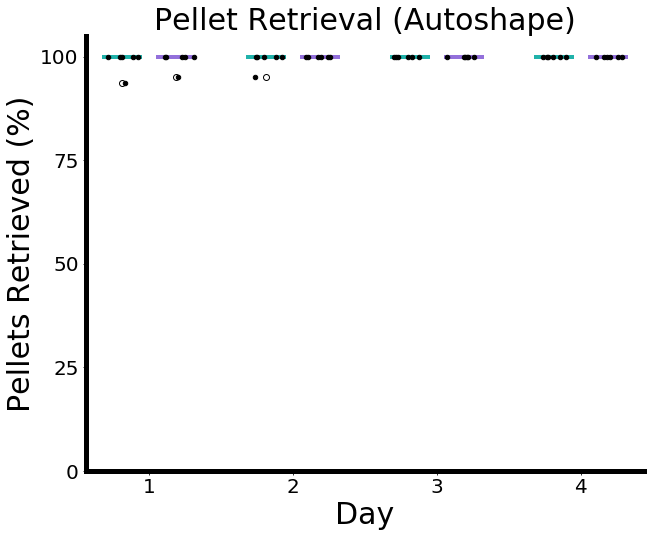

In [ ]:
####################################### door shape latency difference ###########################
experiment = "Autoshape"
metric = 'proportion_pellet_retrieved'



ani, day, presses = lf.get_data(metric = metric, experiment= experiment, dataset = lon_ana)




prop_pellet_m, prop_pellet_f = presses[:6], presses[6:]


first_m = np.zeros((6,len(press_m[0])))
first_f = np.zeros((6,len(press_m[0])))



##############################3


plot_data_m = prop_pellet_m*100
plot_data_f = prop_pellet_f*100
pos_m = [i*2+1 for i in range(len(plot_data_m[0]))]
pos_f = [el+0.75 for el in pos_m]
fig, ax = plt.subplots(figsize = (10,8))



for day_data, position in zip(np.transpose(plot_data_m), pos_m):
    ax.boxplot(day_data[~np.isnan(day_data)], positions=[position],
            patch_artist=True,
            widths = [0.5],
            boxprops = dict(facecolor = colors_rgb['male']+(0.5,), color = colors['male'], linewidth = lw),
            medianprops = dict(color = colors['male'], linewidth = lw),
            whiskerprops= dict(color = colors['male'], linewidth = lw),
            capprops=dict(color = colors['male'], linewidth = lw))


ax.boxplot(plot_data_f, positions=pos_f,
           patch_artist=True,
           boxprops = dict(facecolor = colors_rgb['female']+(0.5,), color = colors['female'], linewidth =lw),
           medianprops = dict(color = colors['female'], linewidth = lw),
           whiskerprops= dict(color = colors['female'], linewidth = lw),
           capprops=dict(color = colors['female'], linewidth = lw))

for i, day_data in enumerate(np.transpose(plot_data_m)):
    d = i*2+1
    ax.scatter(x = random_jitter_x_values(center = d, number = 6, width = 1),s = 20, y = day_data, color = 'black', zorder = 10)

for i, day_data in enumerate(np.transpose(plot_data_f)):
    d = i*2+1.75
    ax.scatter(x = random_jitter_x_values(center = d, number = 6, width = 1), s = 20,y = day_data, color = 'black', zorder = 10)

ax.set_xticks([(i+i+0.75)/2 for i in range(1,2*len(pos_m),2)])
ax.set_xticklabels([str(i) for i in range(1,1+len(pos_m),1)])

ax.set_ylim((0,105))
ax.spines['left'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(5)) 
ax.tick_params(axis = 'both', labelsize = 20)



ax.set_title('Pellet Retrieval (Autoshape)', fontsize = 30)
ax.set_ylabel('Pellets Retrieved (%)',fontsize = 30)
ax.set_xlabel('Day', fontsize = 30)
plt.savefig(os.path.join(output_path, 'pellet retrieval autoshape.svg'))

In [ ]:
mets

{'rounds': <longi_class.Metric at 0x7fb5ac204130>,
 'total_lever_press': <longi_class.Metric at 0x7fb53819b790>,
 'non_press_rounds': <longi_class.Metric at 0x7fb5ac20a610>,
 'prop_non_presses_by_rounds': <longi_class.Metric at 0x7fb538163100>,
 'percent_food_presses': <longi_class.Metric at 0x7fb538163760>,
 'mean_food_lever_press_latency': <longi_class.Metric at 0x7fb538163dc0>,
 'median_food_lever_press_latency': <longi_class.Metric at 0x7fb53816a460>,
 'mean_pellet_latency': <longi_class.Metric at 0x7fb53816a880>,
 'median_pellet_latency': <longi_class.Metric at 0x7fb53816ae80>,
 'num_pellet_retrieved': <longi_class.Metric at 0x7fb538170520>,
 'proportion_round_pellet_retrieved': <longi_class.Metric at 0x7fb538170b80>,
 'proportion_pellet_retrieved': <longi_class.Metric at 0x7fb538175220>,
 'animal_ID': <longi_class.Metric at 0x7fb538175880>,
 'day': <longi_class.Metric at 0x7fb538175ee0>,
 'experiment': <longi_class.Metric at 0x7fb53817c580>,
 'date': <longi_class.Metric at 0x7fb5

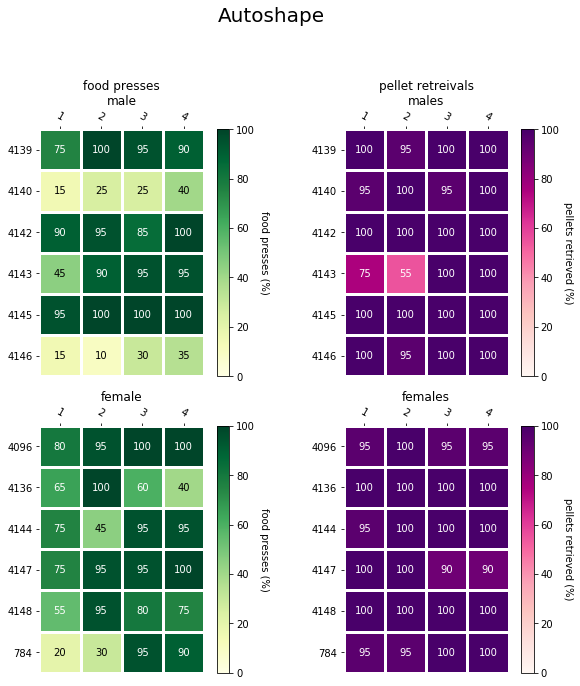

In [ ]:

metric = 'percent_food_presses'
experiment = 'Autoshape'

fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize = (10,10)) 



ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)

ani_males = ani[:6]
ani_females = ani[6:]

vals_m = vals[:6,:]*100
vals_f = vals[6:,:]*100

ax = pf.make_heatmap(vals_m, ani_males, days, title = 'food presses\nmale', 
                     cbarlabel = 'food presses (%)', ax = axs[0,0], 
                     val_floor = 0, val_ceil = 100, valfmt = "{x:.0f}")

ax = pf.make_heatmap(vals_f, ani_females, days, 
                     title = 'female', cbarlabel = 'food presses (%)', ax = axs[1,0], 
                     val_floor = 0, val_ceil = 100, valfmt = "{x:.0f}")


metric = 'proportion_round_pellet_retrieved'


ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)

ani_males = ani[:6]
ani_females = ani[6:]

vals_m = np.around(vals[:6,:]*100, decimals = 0)
vals_f = np.around(vals[6:,:]*100, decimals =0)


ax = pf.make_heatmap(vals_m, ani_males, days, title = 'pellet retreivals\nmales', 
                     cbarlabel = 'pellets retrieved (%)', ax = axs[0,1],
                     val_ceil = 100, val_floor = 0, cmap = 'RdPu', valfmt = "{x:.0f}")

ax = pf.make_heatmap(vals_f, ani_females, days, title = 'females', 
                     cbarlabel = 'pellets retrieved (%)', ax = axs[1,1],
                     val_ceil = 100, val_floor = 0, cmap = 'RdPu', valfmt = "{x:.0f}")


fig.suptitle(experiment, y = 1.05, fontsize = 20)
plt.savefig(os.path.join(output_path, 'autoshape pressing and pellet retrievals.pdf'))

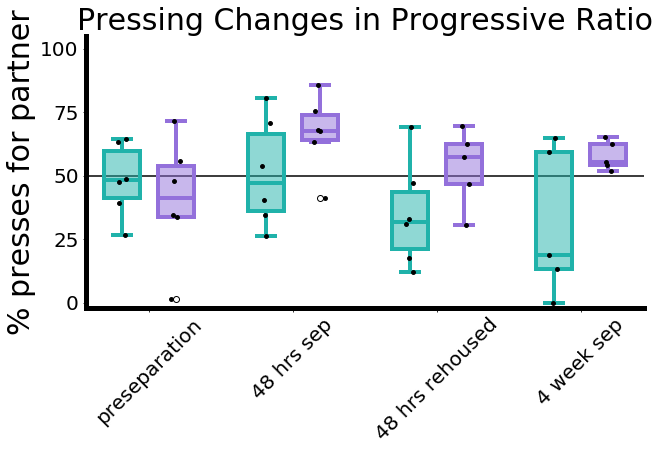

In [ ]:
####################################### Door_shape  proportion ###########################
experiment = "progressive_ratio"
metric = 'door_1_lever_press_count'

days = [5,6,9,12]

ani, day, presses_d1 = lf.get_data(metric = metric, experiment= experiment, days = days, dataset = lon_ana)

metric = 'door_2_lever_press_count'
ani, day, presses_d2 = lf.get_data(metric = metric, experiment= experiment, days = days, dataset = lon_ana)



press_m1, press_f1 = presses_d1[:6], presses_d1[6:]
press_m2, press_f2 = presses_d2[:6], presses_d2[6:]


pref_m = 100*press_m1 / (press_m2 + press_m1)
pref_f = 100*press_f1 / (press_f2 + press_f1)


'''num_days = len(pref_m[0])
first_m = np.zeros((6,num_days))
first_f = np.zeros((6,num_days))

for i in range(len(pref_m[0])):
    first_m[:,i] = pref_m[:,0]
    first_f[:,i] = pref_f[:,0]
diff_m = pref_m - first_m
diff_f = pref_f - first_f
'''


###############



plot_data_m = pref_m
plot_data_f = pref_f
pos_m = [i*2+1 for i in range(len(plot_data_m[0]))]
pos_f = [el+0.75 for el in pos_m]
fig, ax = plt.subplots(figsize = (10,5))

########-------- specifically need to deal with nan value ------ ############

male_ps = []
female_ps = []

for day_data, position in zip(np.transpose(plot_data_m), pos_m):
    ax.boxplot(day_data[~np.isnan(day_data)], positions=[position],
            patch_artist=True,
            widths =[0.5],
            boxprops = dict(facecolor = colors_rgb['male']+(0.5,), color = colors['male'], linewidth = lw),
            medianprops = dict(color = colors['male'], linewidth = lw),
            whiskerprops= dict(color = colors['male'], linewidth = lw),
            capprops=dict(color = colors['male'], linewidth = lw))
    male_ps += [pingouin.ttest(day_data, y = 50)]
    
    
for day_data, position in zip(np.transpose(plot_data_f), pos_f):
    female_ps += [pingouin.ttest(day_data, y = 50)]
    ax.boxplot(day_data[~np.isnan(day_data)], positions=[position],
            patch_artist=True,
            widths = [0.5],
            boxprops = dict(facecolor = colors_rgb['female']+(0.5,), color = colors['female'], linewidth =lw),
            medianprops = dict(color = colors['female'], linewidth = lw),
            whiskerprops= dict(color = colors['female'], linewidth = lw),
            capprops=dict(color = colors['female'], linewidth = lw))

for i, day_data in enumerate(np.transpose(plot_data_m)):
    d = i*2+1
    ax.scatter(x = random_jitter_x_values(center = d, number = 6, width = 0.3),s = 15, y = day_data, color = 'black', zorder = 10)
total_lever_press
ax.spines['right'].set_linewidth(0)
ax.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(5)) 
ax.tick_params(axis = 'both', labelsize = 20)

ax.set_title('Pressing Changes in Progressive Ratio', fontsize = 30)
ax.set_ylabel('% presses for partner',fontsize = 30)
ax.set_xlabel('', fontsize = 30)
ax.set_xticklabels(('preseparation', '48 hrs sep', '48 hrs rehoused', '4 week sep'), rotation = 45)


output_path = '/home/dprotter/Documents/Vole Projects/random plots/plots for liza'
plt.savefig(os.path.join(output_path, 'progressive ratio separation.pdf'), bbox_inches = 'tight')




day_name = ('preseparation', '48 hrs sep', '48 hrs rehoused', '4 week sep')
table = male_ps[0]
table['sex'] = 'm'
table['day'] = day_name[0]



for ps, name in zip(male_ps[1:], day_name[1:]):
    ps['sex'] = 'm'
    ps['day'] = name
    table = pd.concat((table, ps), ignore_index=True)
for ps, name in zip(female_ps, day_name):
    ps['sex'] = 'f'
    ps['day'] = name
    table = pd.concat((table, ps), ignore_index=True)
table.to_csv(os.path.join(output_path, 'progressive ratio separation pvales.csv'))

In [ ]:
df.head()

,animal,day,sex,value,experiment,metric
0,4096,1,f,0.000000,Autoshape,median latency change
1,4096,2,f,-2.036651,Autoshape,median latency change
2,4096,3,f,2.732077,Autoshape,median latency change
3,4096,4,f,3.202890,Autoshape,median latency change
4,4096,5,f,8.413913,Autoshape,median latency change


array([[  0.       ,  -2.0366505,   2.732077 ,   3.20289  ,   8.413913 ],
       [  0.       , -13.4564855, -10.596764 ,  -3.694028 , -17.43457  ],
       [  0.       ,  -3.8843135,  -2.1179245,   2.498809 , -11.253338 ],
       [  0.       ,   6.082013 ,   8.5103595,  11.561046 ,   4.936457 ],
       [  0.       ,  -0.831049 ,   4.010831 ,  -4.8610535,  -4.9618825],
       [  0.       ,  -4.647611 ,  -7.682343 ,  -6.3119295, -10.308835 ]])

In [ ]:
[met for met in mets if 'latency' in met]

['mean_food_lever_press_latency',
 'median_food_lever_press_latency',
 'mean_pellet_latency',
 'median_pellet_latency',
 'mean_door_1_lever_press_latency',
 'mean_door_2_lever_press_latency',
 'median_door_1_lever_press_latency',
 'median_door_2_lever_press_latency',
 'mean_door_1_beam_break_latency',
 'mean_door_2_beam_break_latency',
 'median_door_1_beam_break_latency',
 'median_door_2_beam_break_latency']